<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Course_Summative_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introduction to the Dataset and Brief Summary:**

The dataset analyzed in this report is the UKgas dataset from the datasets package in R. This dataset contains quarterly time series data representing UK natural gas consumption (in millions of therms), recorded over a span of multiple decades. The dataset is frequently used in time series analysis for its clear trends and seasonal patterns.

**Structure of the Dataset:**
* Source: datasets package in R.
* Frequency: Quarterly (4 observations per year).
* Years Covered: 1960 to 1986, spanning 27 years in total.
* Number of Observations: 108 (27 years × 4 quarters).

**Range of Values:**

* Minimum: 84.8 million therms
* First Quartile (Q1): 153.3 million therms
* Median: 220.9 million therms
* Mean: 337.6 million therms
* Third Quartile (Q3): 469.9 million therms
* Maximum: 1163.9 million therms




In [ ]:
data(UKgas)

In [ ]:
UKgas

,Qtr1,Qtr2,Qtr3,Qtr4
1960,160.1,129.7,84.8,120.1
1961,160.1,124.9,84.8,116.9
1962,169.7,140.9,89.7,123.3
1963,187.3,144.1,92.9,120.1
1964,176.1,147.3,89.7,123.3
1965,185.7,155.3,99.3,131.3
1966,200.1,161.7,102.5,136.1
1967,204.9,176.1,112.1,140.9
1968,227.3,195.3,115.3,142.5
1969,244.9,214.5,118.5,153.7


In [ ]:
summary(UKgas)
# this provides the summary of raw dataset before the log transformation and seasonal differencing.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   84.8   153.3   220.9   337.6   469.9  1163.9 

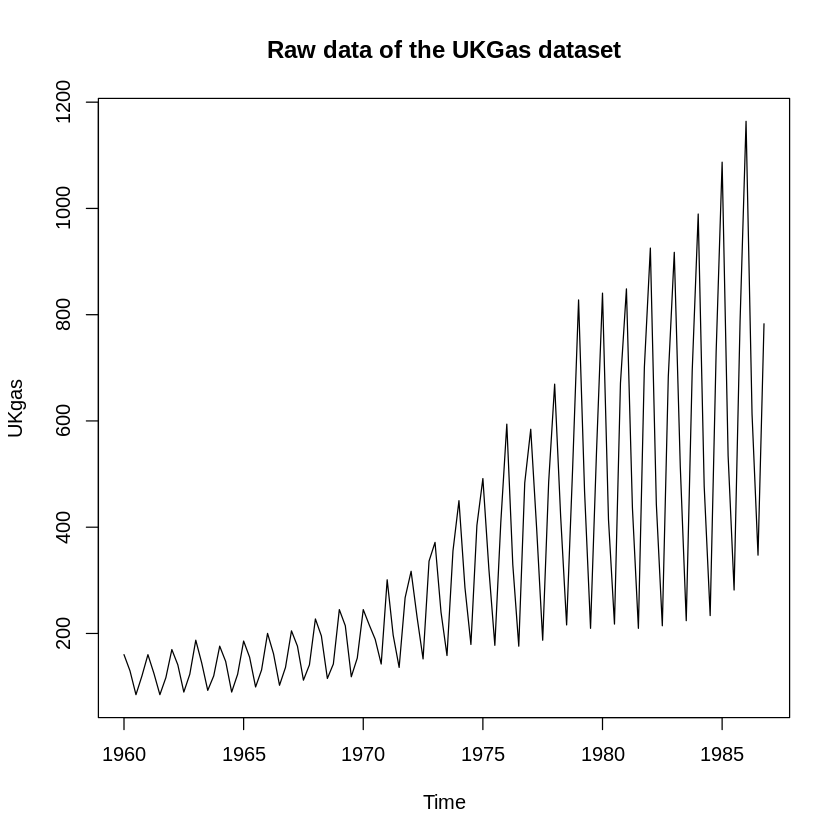

In [ ]:
# Plot the raw UKGas data to visualize trends, seasonality, and variability
plot(UKgas, main="Raw data of the UKGas dataset")

**Initial Observations:**
* **Trend:** The dataset shows a steady upward trend, indicating increasing natural gas consumption over time.
* **Seasonality:** A clear seasonal pattern exists, with regular fluctuations across quarters, reflecting varying gas consumption needs throughout the year.
* **Dependence on Level:** The variability of the series appears to grow with increasing gas consumption, suggesting a possible relationship between level and variance. A logarithmic transformation might be helpful to stabilize the variance.
* **Stationarity:** At first glance, the data does not appear stationary, as both the mean and variance seem to change over time. Stationarity will need to be assessed further using differencing and formal statistical tests.

$$
\begin{array}{c}
\hline \\[-0.5ex]
\textbf{End of brief summary of dataset} \\[-0.5ex]
\hline
\end{array}
$$


**2. Initial Exploration**


**Plot the raw time series:**


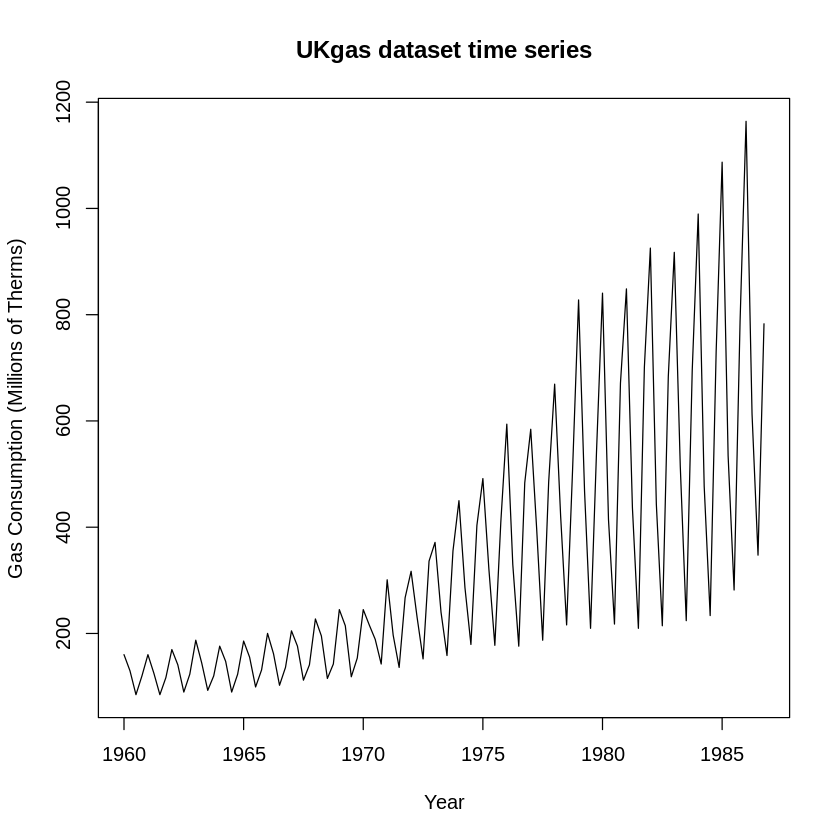

In [ ]:
#Plot the raw time series:
# Convert UKGas to a time series object with quarterly frequency and plot to identify trends and seasonality
UKgas.ts <- ts(UKgas, c(1960, 1), end = c(1986, 4), frequency =4 )
# Re-plotting to confirm trends and seasonal patterns are preserved after conversion
plot(UKgas.ts, main = "UKgas dataset time series", ylab = "Gas Consumption (Millions of Therms)", xlab = "Year")



In [ ]:
# Run augmented Dickey-Fuller Test (ADF) for stationarity under different assumptions (ct, nc, and c)
Y <- (length(UKgas.ts) - 1)^(1/3)  # Calculate optimal lag length using rule of thumb
Y

# ADF test with constant and trend (ct)
chicken_with_ct <- adfTest(UKgas.ts, type = 'ct', lag = 4)
chicken_with_ct

# ADF test with no constant (nc)
chicken_with_nc <- adfTest(UKgas.ts, type = 'nc', lag = 4)
chicken_with_nc

# ADF test with constant only (c)
chicken_with_c <- adfTest(UKgas.ts, type = 'c', lag = 4)
chicken_with_c


[1] 4.747459


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 4
  STATISTIC:
    Dickey-Fuller: -1.6079
  P VALUE:
    0.7393 

Description:
 Fri Dec  6 05:45:20 2024 by user: 

Warning message in adfTest(UKgas.ts, type = "nc", lag = 4):
“p-value greater than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 4
  STATISTIC:
    Dickey-Fuller: 6.9623
  P VALUE:
    0.99 

Description:
 Fri Dec  6 05:45:20 2024 by user: 

Warning message in adfTest(UKgas.ts, type = "c", lag = 4):
“p-value greater than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 4
  STATISTIC:
    Dickey-Fuller: 3.4925
  P VALUE:
    0.99 

Description:
 Fri Dec  6 05:45:20 2024 by user: 

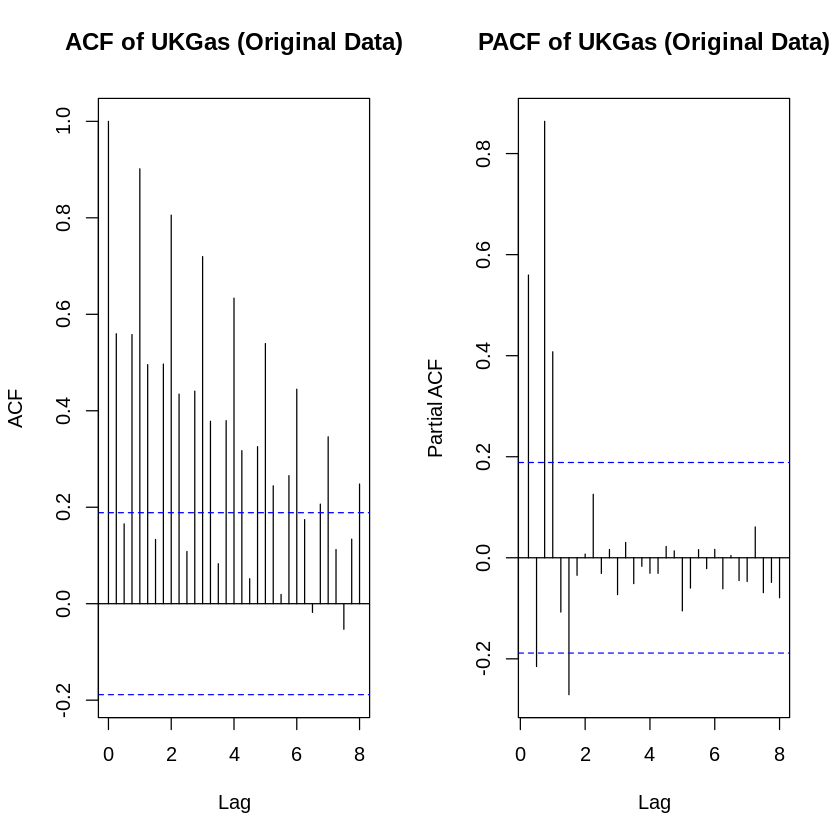

In [ ]:
# Plot ACF and PACF to assess non-stationarity in the original time series
par(mfrow = c(1, 2))  # Arrange plots side by side
acf(UKgas.ts, main = "ACF of UKGas (Original Data)", lag.max = 32)  # ACF plot for raw data
pacf(UKgas.ts, main = "PACF of UKGas (Original Data)", lag.max = 32)  # PACF plot for raw data


**Initial Exploration of the UKgas Datase and plot:** The UKgas dataset represents quarterly gas consumption in millions of therms from 1960 to 1986, exhibiting distinct trends and seasonality.


**The time series plot of the UKgas dataset shows:**

* **Presence of a Trend:**
  * The plot exhibits a clear upward trend over time, indicating a consistent increase in gas consumption from 1960 to 1986.
  * This trend suggests that the data is non-stationary, as the mean and variance are not constant over time.

* **Evidence of Seasonality:**
  * Seasonal patterns are evident, with repeating fluctuations within each year.
  * These fluctuations likely reflect the quarterly periodicity in gas consumption, as expected for a dataset with a frequency of 4 (quarters).
  * The amplitude of the seasonal variation increases over time, suggesting non-constant variance (heteroscedasticity).

**Stationarity Check**

* **Visual Inspection for stationarity:**

  * The presence of a trend and seasonal patterns confirms that the dataset is non-stationary in its raw form.
  * The increasing variance in seasonal peaks over time further supports this observation.

* **Dickey-Fuller Test Results:**

  * Augmented Dickey-Fuller (ADF) tests with various assumptions (trend, constant, and none) fail to reject the null hypothesis of non-stationarity.
  * This statistical confirmation aligns with the visual inspection.

**ACF and PACF Observations (Raw Data):**

* **ACF (Autocorrelation Function):**

  * Strong positive autocorrelations across multiple lags, reflecting the trend in the data.
  * Seasonal spikes are evident at lags 4, 8, 12, etc., confirming quarterly seasonality.
* **PACF (Partial Autocorrelation Function):**

  * Significant spikes at the first few lags suggest the potential for autoregressive (AR) terms in the model.
  
**Next Steps in the Analysis**

* **Transformations and Differencing:**

  * Apply a logarithmic transformation to stabilize the variance (heteroscedasticity).
  * Perform seasonal differencing with a lag of 4 to remove seasonal patterns.
  * Assess whether further non-seasonal differencing is necessary to address any residual trend.

* **Stationarity Check (Post-Preprocessing):**

  * Reevaluate stationarity using ADF tests on the differenced dataset.
  * Use ACF and PACF plots of the differenced data to identify ARIMA or SARIMA model components.

* **ARIMA/SARIMA Modeling:**

  * Fit a SARIMA model to capture the trend, seasonality, and noise in the dataset.
  * Perform residual diagnostics to validate model assumptions and adequacy.

* **Forecasting:**

  * Generate forecasts using the fitted SARIMA model.
  * Evaluate the accuracy of the forecasts using appropriate confidence intervals and error metrics.

This combined analysis emphasizes the importance of preprocessing (transformation and differencing) to address non-stationarity and seasonality before ARIMA/SARIMA modeling. The next steps involve confirming stationarity, identifying model parameters, and validating the model for accurate forecasting.


$$
\begin{array}{c}
\textbf{End of Initial Exploration} \\[-0.5ex]
\hline
\end{array}
$$



<br>

**3. Planned Next Steps: Step-01 to Step-08**

<br>

* **Step-01: Log Transformation**
* **Step-02: Seasonal Differencing (Lag-4)**
* **Step-03: Stationarity Check After Differencing**
* **Step-04: Examine Seasonal Difference Lag-4 ACF/PACF Plots**
* **Step-05: Model Fitting (Seasonal Difference and Log Transformed)**
* **Step-06: Diagnostics and Validation**
* **Step-07:(S)ARIMA Forecast**
* **Step-08 Exponential Smoothing Fit**


<br>
<br>

**Step-01: Log Transformation:**

  * It seems the variability in the series appears to grow with the level of the data, apply a logarithmic transformation to stabilize variance.
  * Perform Dickey-Fuller tests (ct, c, nc) on the log transformed series (UKgas.diff) to confirm stationarity.
  * Plot the log-transformed series and inspect for trends or seasonality.


[1] 4.747459


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 4
  STATISTIC:
    Dickey-Fuller: -2.016
  P VALUE:
    0.57 

Description:
 Fri Dec  6 05:45:36 2024 by user: 

Warning message in adfTest(log_UKGas, "c", lag = 4):
“p-value greater than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 4
  STATISTIC:
    Dickey-Fuller: 0.6841
  P VALUE:
    0.99 

Description:
 Fri Dec  6 05:45:36 2024 by user: 

Warning message in adfTest(log_UKGas, "nc", lag = 4):
“p-value greater than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 4
  STATISTIC:
    Dickey-Fuller: 6.4702
  P VALUE:
    0.99 

Description:
 Fri Dec  6 05:45:36 2024 by user: 

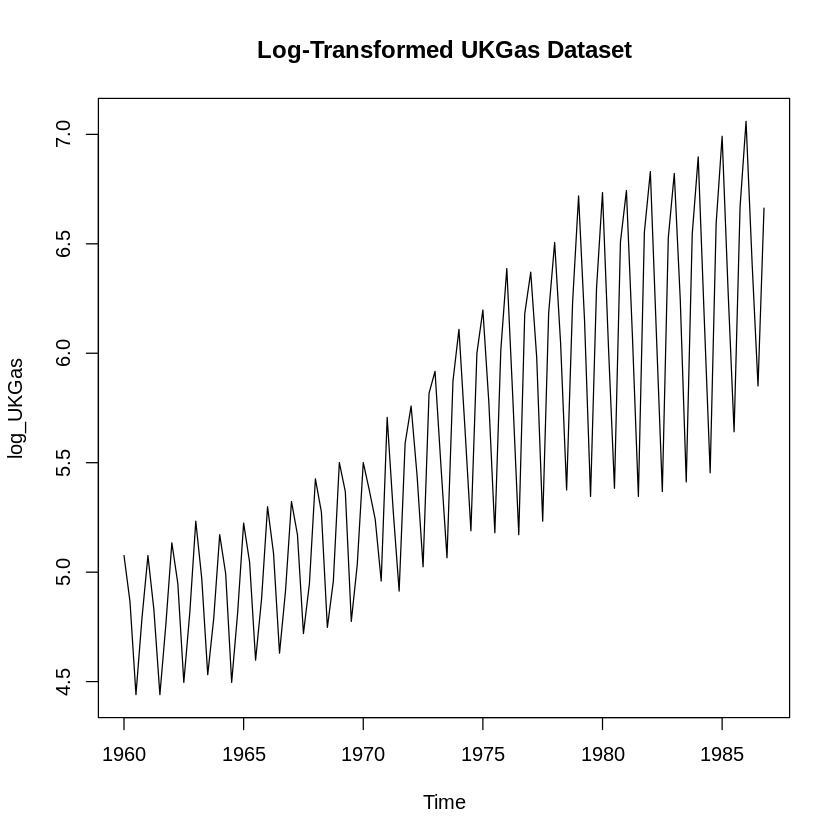

In [ ]:
# Step-01: Apply log transformation to stabilize variance
log_UKGas <- log(UKgas.ts)  # Log-transform the UKGas time series
plot(log_UKGas, main = "Log-Transformed UKGas Dataset")  # Plot the transformed data

# Calculate optimal lag
Y <- (length(log_UKGas) - 1)^(1 / 3)
Y  # Display the calculated lag

# Perform Augmented Dickey-Fuller tests on the log-transformed data
adfTest(log_UKGas, 'ct', lag = 4)  # Test with trend and intercept
adfTest(log_UKGas, 'c', lag = 4)   # Test with intercept only
adfTest(log_UKGas, 'nc', lag = 4)  # Test with no intercept or trend


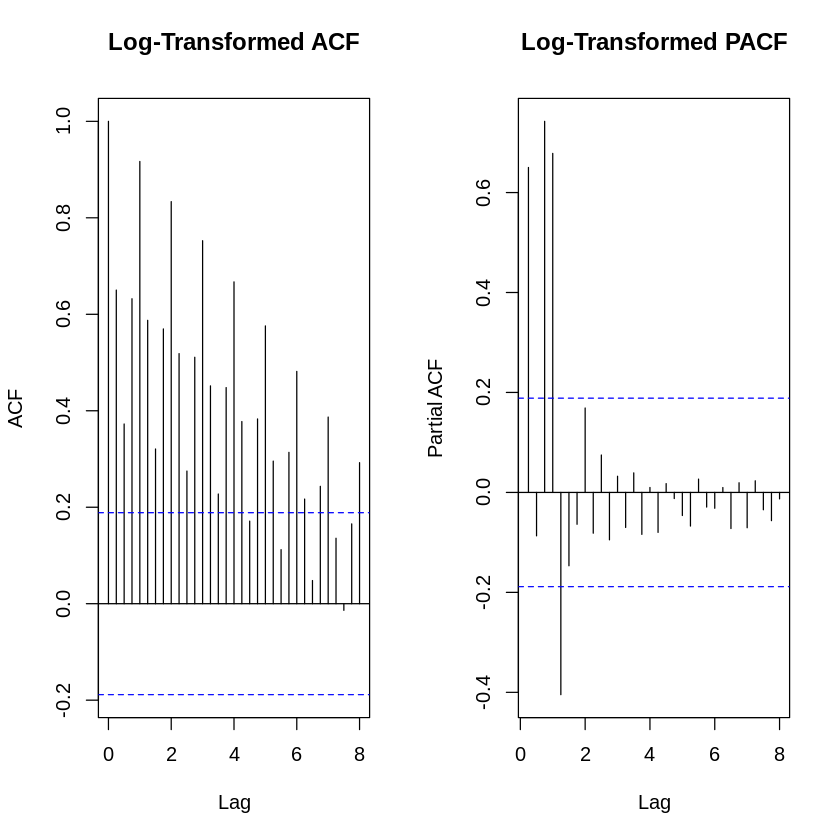

In [ ]:
# Step-01: Log Transformation ACF and PACF Plots
# Visualize the autocorrelation (ACF) and partial autocorrelation (PACF) for the log-transformed data
par(mfrow=c(1,2))
acf(log_UKGas, main = "Log-Transformed ACF", lag.max=32)
pacf(log_UKGas,main = "Log-Transformed PACF", lag.max=32)

**Findings Summary for Log-Transformed Step-01 Results:**

**Key Observations:**

* **Trend:**

  * After applying the logarithmic transformation, the upward trend in the data remains visible.
  * This indicates that while the transformation helps stabilize variance, it does not address the non-stationarity caused by the trend.
  
* **Variance:**

  * The variability across the time series appears more stabilized compared to the original dataset.
  * Log transformation effectively reduces heteroscedasticity, making the variance more consistent over time.

* **Purpose of Transformation:**

  * The log transformation successfully reduced variance but was not sufficient to remove the upward trend, which is a primary feature of non-stationarity.

* **Dickey-Fuller Test Results:**

  * With Trend (ct): p-value = 0.57 → Fails to reject the null hypothesis of non-stationarity.
  * With Constant (c): p-value = 0.99 → Fails to reject the null hypothesis of non-stationarity.
  * Without Constant (nc): p-value = 0.99 → Again, fails to reject the null hypothesis of non-stationarity.
  * All test variations confirm that the series remains non-stationary even after the log transformation.

* **ACF and PACF Analysis:**

  * The ACF plot for the log-transformed data shows strong positive autocorrelations across multiple lags, consistent with the presence of a trend.
  * The PACF plot suggests initial significant lags, indicating potential autoregressive components.
  * No substantial difference is observed between the ACF and PACF plots for the log-transformed data and the original data.

**Conclusion from Step-01:**
* The logarithmic transformation was effective in reducing variance (addressing heteroscedasticity) but insufficient to address the upward trend or achieve stationarity.

**Next Steps:**
* Perform seasonal differencing (lag = 4) to remove seasonality.
* Apply additional non-seasonal differencing if required to achieve stationarity.
* Reassess the ACF and PACF plots for the differenced series to guide ARIMA/SARIMA modeling.

These findings collectively suggest that while the log transformation addressed variance-related issues, additional preprocessing (differencing) is required to make the series stationary.

$$
\begin{array}{c}
\textbf{End of Step-01} \\[-0.5ex]
\hline
\end{array}
$$




<br>

**Step-02: Seasonal Differencing (Lag-4):**

  * Since the data appears to have a seasonal component (frequency = 4), perform a seasonal differencing (diff(log_UKGas, lag=4)).
  * This will remove the seasonal pattern. Plot the differenced series to inspect for residual trends or seasonality.



,Qtr1,Qtr2,Qtr3,Qtr4
1961,0.000000000,-0.037710674,0.000000000,-0.027005861
1962,0.058233552,0.120537002,0.056175226,0.053301542
1963,0.098679437,0.022457084,0.035052877,-0.026295681
1964,-0.061659594,0.021963820,-0.035052877,0.026295681
1965,0.053080453,0.052887407,0.101674802,0.062864371
1966,0.074684773,0.040384036,0.031717228,0.035905128
1967,0.023704814,0.085309249,0.089528531,0.034660509
1968,0.103748676,0.103484822,0.028146097,0.011291581
1969,0.074579233,0.093772900,0.027375533,0.075660651
1970,0.000000000,0.007431525,0.466304814,-0.075660651


[1] 0.06559395

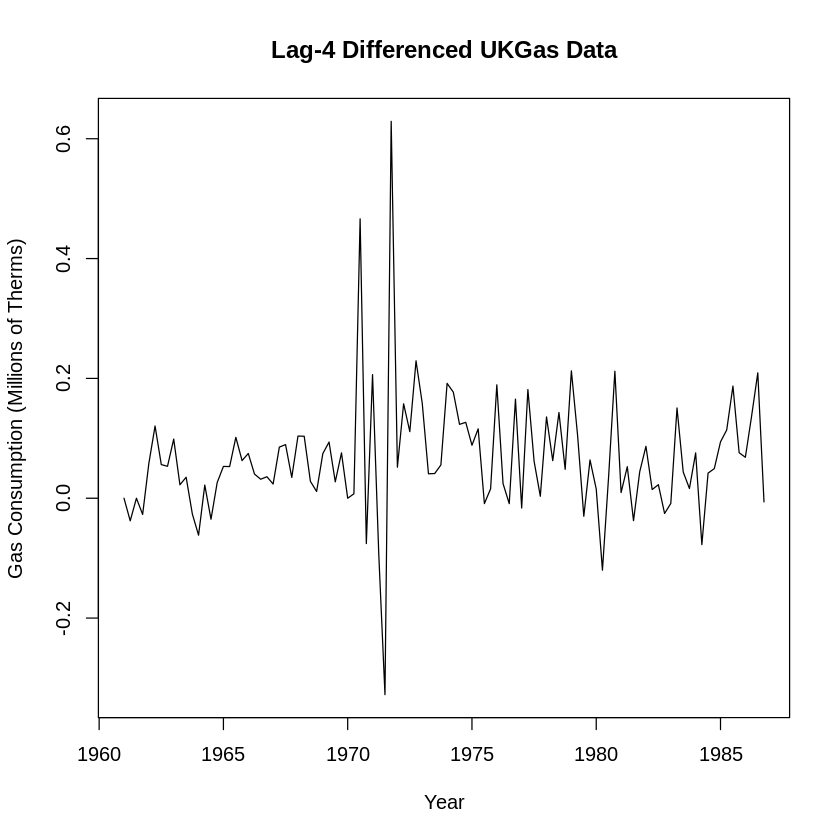

In [ ]:
# Step-02: Seasonal Differencing
# Apply seasonal differencing to remove quarterly seasonality (lag = 4)
UKgas.diff <- diff(log_UKGas, lag = 4)  # Compute lag-4 differences for seasonal adjustment
UKgas.diff  # Display the differenced data
mean(UKgas.diff)  # Calculate the mean of the differenced data to check for stationarity

# Plot the lag-4 differenced time series
plot(UKgas.diff, main = "Lag-4 Differenced UKGas Data",
     ylab = "Gas Consumption (Millions of Therms)",
     xlab = "Year")


**Findings Summary: Step-02 Seasonal Differencing**

**Observations from the Seasonal Differencing Plot:**


* **Seasonality Removed:**

  * The application of Lag-4 differencing successfully removed the seasonal patterns present in the original UKgas dataset.
  * Repetitive fluctuations observed in the original series are no longer visible in the differenced series, as evidenced in the plot.

* **Trend Stabilization:**

  * The differenced series appears more stabilized, with no apparent long-term global trend.
  * However, noticeable fluctuations persist, which could indicate a need for further differencing or confirmation using stationarity tests.

* **Stationarity Evidence:**

  * The plot demonstrates that the mean of the differenced series is approximately zero, aligning with expectations after seasonal differencing.
  * To statistically validate stationarity, further analysis using tests such as the Augmented Dickey-Fuller (ADF) test **(Step-03)** is required.

**Observations from the Differenced Data (Tabulated Values)**

* **Fluctuations Around Zero:**

  * The differenced values oscillate around 0, suggesting that the seasonal component has been effectively removed.
  * These fluctuations are consistent with the goal of removing seasonality while preserving the inherent structure of the data.

* **Reduced Trends:**

  * The series no longer exhibits the dominant upward trends seen in the raw data, reinforcing the effectiveness of seasonal differencing.

**Next Steps:**

* **Stationarity Confirmation:**

  * Perform the Augmented Dickey-Fuller (ADF) test on the lag-differenced data to verify stationarity across all configurations (ct, c, and nc).

* **Further Differencing:**

  * If the ADF test results indicate non-stationarity (e.g., p-value > 0.05 for certain configurations), consider applying non-seasonal differencing (lag = 1) to achieve full stationarity.

* **ACF and PACF Analysis:**

  * Examine the ACF and PACF plots of the differenced series to determine the appropriate ARIMA/SARIMA model orders for further modeling and forecasting.

**Conclusion**

The Lag-4 seasonal differencing has effectively removed the seasonality in the UKgas dataset and stabilized the series. While the plot and tabulated values suggest near-stationarity, statistical tests such as the ADF test are required for confirmation. This step sets the foundation for further model development and forecasting.

$$
\begin{array}{c}
\textbf{End of Step-02} \\[-0.5ex]
\hline
\end{array}
$$

<br>
<br>
<br>




**Step-03: Stationarity Check After Differencing:**

* Perform Dickey-Fuller tests (ct, c, nc) on the differenced series (UKGas.diff) to confirm stationarity.
* Check whether the p-values fall below the significance threshold (0.05), which would confirm stationarity.


In [ ]:
# Step-03: Stationarity Check After Differencing
# Verify stationarity of the lag-4 differenced data using the Augmented Dickey-Fuller (ADF) test

# Calculate the optimal lag length for ADF test using the formula (length - 1)^(1/3)
Y <- (length(UKgas.diff) - 1)^(1/3)
Y  # Display the computed lag length

# Perform ADF tests for different model types:
adf_ct <- adfTest(UKgas.diff, type = "ct", lag = 4)  # ADF test with constant and trend
adf_c <- adfTest(UKgas.diff, type = "c", lag = 4)  # ADF test with constant only
adf_nc <- adfTest(UKgas.diff, type = "nc", lag = 4)  # ADF test with no constant or trend

# Print the results of the ADF tests for interpretation
print(adf_ct)
print(adf_c)
print(adf_nc)


[1] 4.687548

Warning message in adfTest(UKgas.diff, type = "c", lag = 4):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 4
  STATISTIC:
    Dickey-Fuller: -3.8731
  P VALUE:
    0.01803 

Description:
 Fri Dec  6 05:45:53 2024 by user: 

Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 4
  STATISTIC:
    Dickey-Fuller: -3.8812
  P VALUE:
    0.01 

Description:
 Fri Dec  6 05:45:53 2024 by user: 

Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 4
  STATISTIC:
    Dickey-Fuller: -1.6369
  P VALUE:
    0.09608 

Description:
 Fri Dec  6 05:45:53 2024 by user: 


**Summary of Step-03 Stationarity Check After Seasonal Differencing (Lag-04)**

**Objective:**

To confirm the stationarity of the Lag-4 differenced UKGas dataset (UKgas.diff) using the Augmented Dickey-Fuller (ADF) test with three variations:

  * ct: Includes a constant and trend.
  * c: Includes only a constant.
  * nc: No constant or trend included.

**Key Results:**

  * **With Trend (ct):**

    * Dickey-Fuller Statistic: -3.8731
    * p-value: 0.01803
    * Interpretation: The p-value is below the threshold of 0.05, allowing us to reject the null hypothesis of non-stationarity. The series is stationary under the assumption of a constant and trend.

* **With Constant Only (c):**

  * Dickey-Fuller Statistic: -3.8812
  * p-value: 0.01
  * Interpretation: The p-value is below 0.05, confirming stationarity with a constant but no trend and allowing us to reject the null hypothesis of non-stationarity.

* **No Constant or Trend (nc):**

  * Dickey-Fuller Statistic: -1.6369
  * p-value: 0.09608
  * Interpretation: The p-value is higher than the threshold of 0.05, meaning we **fail to reject the null hypothesis of non-stationarity when no constant or trend is included**.
  
**Key Takeaways:**

* **Stationarity Evidence:**

  * The ct and c configurations confirm stationarity, as their p-values are below 0.05.
  * However, the nc configuration fails to confirm stationarity due to its p-value being higher than 0.05. This indicates the possibility of residual non-stationarity and suggests the need for further non-seasonal differencing if required.

* **Conservative Approach:**

  * The ct test (constant and trend) is the most conservative result. While it confirms stationarity (p-value = 0.01803), the results suggest closely monitoring the series during ARIMA/SARIMA modeling for residual stationarity issues.

* **Implications:**
  * The nc result (**p-value = 0.09608**) suggests that further non-seasonal differencing might be necessary to address residual trends or non-stationarity.
  * However, for now, it is reasonable to proceed with ARIMA and SARIMA diagnostics using the current differenced series. If residual diagnostics (ACF/PACF of residuals or Ljung-Box test) indicate issues, additional differencing can be applied.

**Next Steps:**

* **ARIMA/SARIMA Identification:**
  * Use ACF and PACF plots of the differenced series to identify potential AR and MA terms.
  * Fit ARIMA/SARIMA models and evaluate using AIC, residual diagnostics, and forecasting accuracy.

* **Model Diagnostics:**

  * Check residuals of fitted models for stationarity.
  * Reassess whether additional differencing is necessary based on model performance.

**Conclusion:**
While the ct and c tests confirm stationarity, the **nc test suggests caution**. Proceeding with the current differenced series is acceptable, but further non-seasonal differencing might be needed if ARIMA/SARIMA diagnostics indicate residual non-stationarity.

$$
\begin{array}{c}
\textbf{End of Step-03} \\[-0.5ex]
\hline
\end{array}
$$
<br>
<br>



**Step-04: Examine Seasonal Difference Lag-4 ACF/PACF Plots:**

  * Plot the ACF and PACF of the differenced series to identify the potential order of AR and MA terms.
  * Look for spikes at seasonal lags (4, 8, etc.) and non-seasonal components.

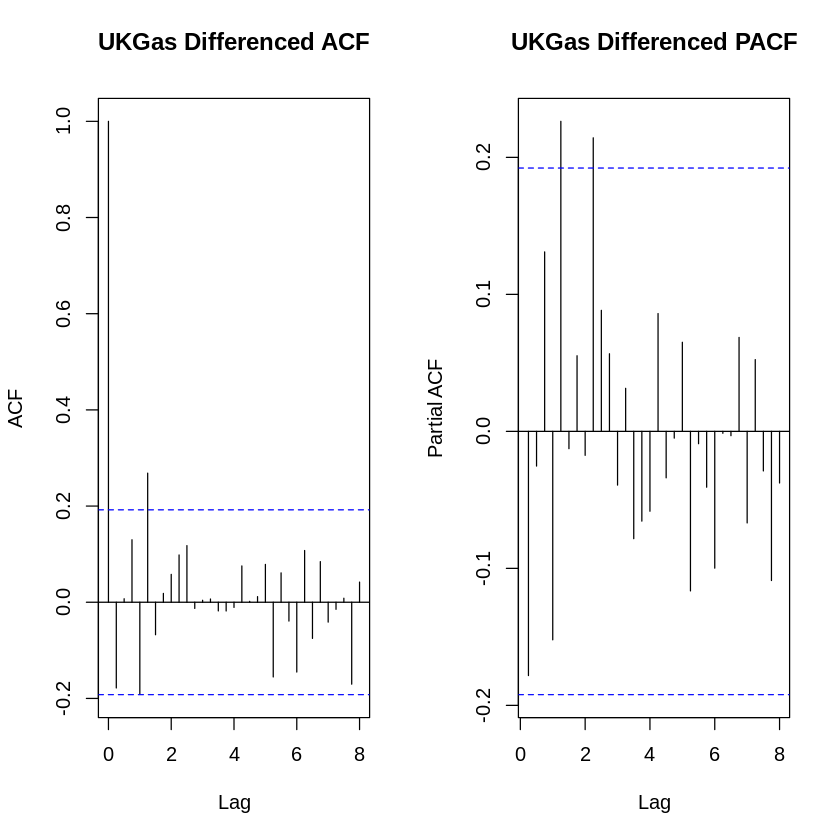

In [ ]:
# Step-04: Examine Differenced ACF/PACF Plots
# Visualize the autocorrelation and partial autocorrelation structure of the lag-4 differenced data

# Set up a 1x2 grid for the plots
par(mfrow = c(1, 2))

# Plot the ACF for the differenced data to analyze remaining autocorrelations
acf(UKgas.diff, main = "UKGas Differenced ACF", lag.max = 32)

# Plot the PACF for the differenced data to identify potential AR terms
pacf(UKgas.diff, main = "UKGas Differenced PACF", lag.max = 32)


**Step-04: Summary of Seasonal Difference Lag-04 ACF and PACF Plots Analysis**

**Observations from the ACF and PACF Plots:**
* **ACF Plot:**

  * The ACF shows significant spikes at the first few lags, especially at lag 1, and decays gradually.
  * There are minor seasonal patterns visible at multiples of lag 4 consistent with the quarterly seasonality of the dataset.
  * This suggests the possible presence of a seasonal moving average (SMA) component in the SARIMA model.
  
* **PACF Plot:**

  * The PACF shows a sharp spike at lag 1, followed by a quick decay.
Seasonal spikes are visible, though less pronounced compared to the ACF plot.
  * The spike at lag 1 indicates the potential inclusion of a non-seasonal autoregressive (AR) term.
  * Seasonal spikes suggest the potential inclusion of a seasonal autoregressive (SAR) term.

**Interpretation for SARIMA Model Selection:**
* **Non-Seasonal Terms:**

  * AR order (p): Likely 1 (significant PACF spike at lag 1).
  * MA order (q): Can be explored further using auto.arima.

* **Seasonal Terms:**

  * Seasonal AR (P): Likely 1 (mild PACF seasonal spike at lag 4).
  * Seasonal MA (Q): Likely 1 (visible ACF spike at lag 4).
  * Seasonal Differencing (D): Lag 4 differencing has already been applied.

**Next Steps:**

Use auto.arima() to validate the suggested terms and compare AIC/AICC values for various models.
Perform residual diagnostics (e.g., check residuals for independence and normality) to confirm model adequacy.

**Conclusion:**
* The analysis of the ACF and PACF plots after lag-4 differencing provides a strong foundation for selecting SARIMA model parameters.
* The visual patterns suggest the need for both non-seasonal and seasonal components in the model, which will be validated in subsequent steps.



$$
\begin{array}{c}
\textbf{End of Step-04} \\[-0.5ex]
\hline
\end{array}
$$
<br>
<br>


<br>

**Step-05: Model Fitting (Seasonal Difference and Log Transformed):**

* Use auto.arima with trace=FALSE and appropriate parameters based on the differenced data and on original data.
  * Purpose: The trace=FALSE output shows only model that is considered by auto.arima along with their respective AICc values. (Considering this option so I don't show the convergence part)
* Use auto.arima with allowdrift = FALSE this will consider only models  that are not associated with drift
* Use auto.arima with allowmean=FALSE If ‘TRUE’, models with a non-zero mean are considered.
* Use auto.arima with approximation = FALSE for more and precise accuracy model choice
* Compare models suggested by auto.arima to identify the best-fitting ARIMA or SARIMA model based on AIC and AICc

<br>

**Running the (Seasonal Difference Lag-04) UKGas.diff dataset below on auto.arima:**

In [ ]:

# Step-05: Fitting ARIMA Model on Differenced Data
# Use the `auto.arima` function to identify the best-fitting ARIMA model for the lag-4 differenced data
# Disable mean and drift to ensure stationary modeling assumptions
# Set `trace = FALSE` to suppress detailed output during model search and ensure `approximation = FALSE` for precise estimation

diff_model<-auto.arima(UKgas.diff, allowmean=FALSE,allowdrift = FALSE,trace = FALSE,stationary = TRUE, approximation = FALSE)

# Display the summary of the chosen ARIMA model, including coefficients and diagnostics
summary(diff_model)


Series: UKgas.diff 
ARIMA(2,0,3)(1,0,0)[4] with zero mean 

Coefficients:
         ar1     ar2      ma1      ma2     ma3     sar1
      0.2180  0.7640  -0.3207  -0.8073  0.3365  -0.1811
s.e.  0.1331  0.1328   0.1540   0.1036  0.1075   0.1093

sigma^2 = 0.01045:  log likelihood = 91.66
AIC=-169.32   AICc=-168.15   BIC=-150.81

Training set error measures:
                     ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set 0.01396307 0.09921011 0.06809948 NaN  Inf 0.6255062 -0.01275188

<br>

**Running the (Log Transformation) log_UKGas dataset below on auto.arima:**

In [ ]:
# Step-05: Fitting ARIMA Model on Log-Transformed Data
# Use the `auto.arima` function to identify the best-fitting ARIMA model for the log-transformed dataset
# Disable drift (`allowdrift = FALSE`) to ensure consistent modeling of the data without unnecessary trends
# Set `trace = FALSE` to suppress detailed output during model search and ensure `approximation = FALSE` for precise estimation

log_model<-auto.arima(log_UKGas, trace = FALSE, allowdrift = FALSE, approximation = FALSE)
# Display the summary of the chosen ARIMA model, including coefficients and diagnostics
summary(log_model)


Series: log_UKGas 
ARIMA(2,0,3)(1,1,0)[4] 

Coefficients:
         ar1     ar2      ma1      ma2     ma3     sar1
      0.2180  0.7640  -0.3207  -0.8073  0.3365  -0.1811
s.e.  0.1331  0.1328   0.1540   0.1036  0.1075   0.1093

sigma^2 = 0.01045:  log likelihood = 91.66
AIC=-169.32   AICc=-168.15   BIC=-150.81

Training set error measures:
                     ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.01362301 0.09735986 0.06575475 0.2256865 1.187348 0.7710271
                    ACF1
Training set -0.01235056

**Summary of Model Fitting Results:**

**1. UKgas.diff (Seasonal Differenced Lag-04):**

* **Best Model (Approximation = FALSE):**

  * Model: ARIMA(2,0,3)(1,0,0)[4] with zero mean
  * AIC: -169.32
  * AICc: -168.15
  * Residual Variance (σ²): 0.01045

**2. log_UKGas (Log-Transformed Data):**

* **Best Model (Approximation = FALSE):**

  * Model: ARIMA(2,0,3)(1,1,0)[4]
  * AIC: -169.32
  * AICc: -168.15
  * Residual Variance (σ²): 0.01045


**Insights and Recommendations:**

* The ARIMA(2,0,3)(1,0,0)[4] model for the differenced data and the ARIMA(2,0,3)(1,1,0)[4] model for the log-transformed data both exhibit the lowest AIC and AICc values, indicating a superior fit compared to other models considered.

* The residual variance (σ²) is consistent across both models, suggesting similar levels of unexplained variance.

* Given the comparable performance metrics, either model could be appropriate. However, the choice between differenced and log-transformed data should be informed by the specific characteristics of the dataset and the underlying assumptions of the ARIMA model.

**Model Selection Criteria:**

* **AIC/AICc:** Lower values indicate a better model fit. Both selected models have the lowest AIC and AICc among the candidates.

* **Residual Variance:** Indicates the model’s ability to minimize errors; both models show identical residual variance.

**Conclusion:**

* Both the ARIMA(2,0,3)(1,0,0)[4] model for the differenced data and the ARIMA(2,0,3)(1,1,0)[4] model for the log-transformed data provide a good fit. The final model selection should consider the data's specific characteristics and the context of the analysis.

$$
\begin{array}{c}
\textbf{End of Step-05} \\[-0.5ex]
\hline
\end{array}
$$

<br>
<br>


**Step-06: Diagnostics and Validation:**

* Perform diagnostics on the residuals of the fitted model (e.g., check for white noise using ACF/PACF and Ljung-Box tests).
* Ensure that residuals show no significant autocorrelation.
  * Following models will run below:
    * **Sarima Model1 ARIMA (2,0,3) (1,0,0) [4] on Lag-04 Seasonal diffenced data**
    * **S𝐚𝐫𝐢𝐦𝐚 𝐌𝐨𝐝𝐞𝐥2 𝐀𝐑𝐈𝐌𝐀 (2,0,3)(1,1,0)[4]) 𝐨𝐧 𝐋𝐨𝐠 𝐭𝐫𝐚𝐧𝐬𝐟𝐨𝐫𝐦𝐚𝐭𝐢𝐨𝐧 𝐝𝐚𝐭𝐚**


<br>
<br>


$$
\begin{array}{c}
\textbf{1. Sarima Model1 ARIMA (2,0,3) (1,0,0) [4] on Lag-04 Seasonal diffenced data} \\[-0.5ex]
\hline
\end{array}
$$

<><><><><><><><><><><><><><>
 
Coefficients: 
ar1     0.1512 0.1500  1.0083  0.3158
ar2     0.6995 0.1405  4.9796  0.0000
ma1    -0.2867 0.1696 -1.6903  0.0942
ma2    -0.7691 0.1158 -6.6438  0.0000
ma3     0.3360 0.1081  3.1083  0.0025
sar1   -0.1866 0.1103 -1.6913  0.0940
xmean   0.0653 0.0143  4.5549  0.0000

sigma^2 estimated as 0.009587757 on 97 degrees of freedom 
 
AIC = -1.647653  AICc = -1.636435  BIC = -1.444238 
 


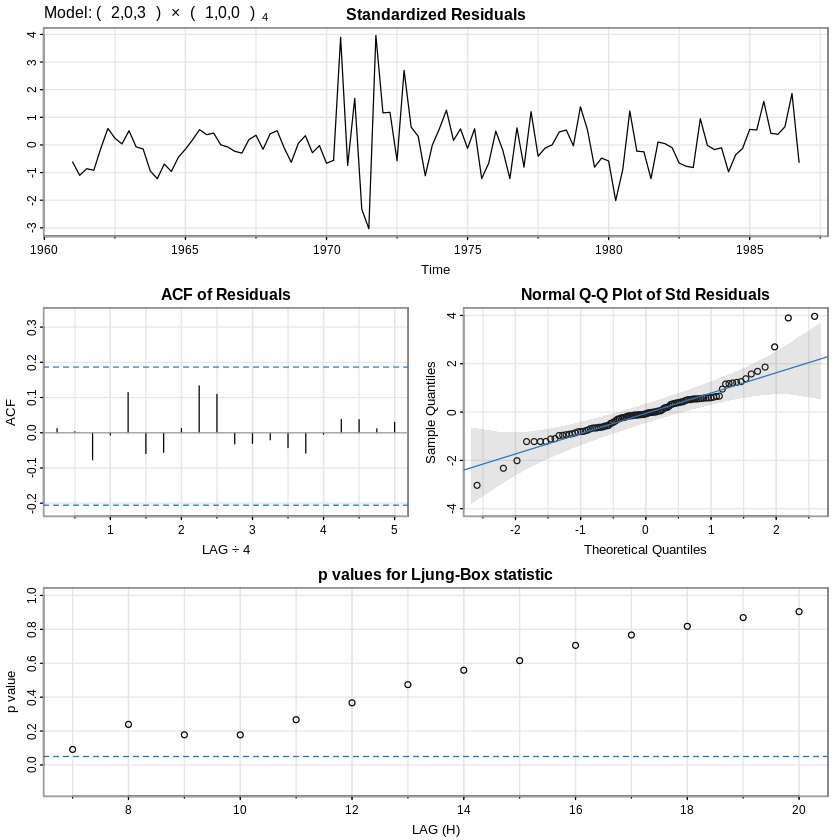

In [ ]:
# Step-06 Try ARIMA on differenced data

# Capture all output
model1 <- capture.output(sarima(UKgas.diff, 2,0,3,1,0,0,4))

# Filter out convergence details
filtered_output <- grep("iter|value|converged", model1, invert=TRUE, value=TRUE)

# Display filtered output
cat(filtered_output, sep="\n")



**Findings Summary for SARIMA Model1 (ARIMA(2,0,3)(1,0,0)[4] on Differenced Data)**


**Model Fitted**

* **Model: ARIMA(2,0,3)(1,0,0)[4] with non-zero mean**
* **Coefficients:**
  * AR(1): 0.1512 (p-value: 0.3158)
  * AR(2): 0.6995 (p-value: 0.0000)
  * MA(1): -0.2867 (p-value: 0.0942)
  * MA(2): -0.7691 (p-value: 0.0000)
  * MA(3): 0.3360 (p-value: 0.0025)
  * SAR(1): -0.1866 (p-value: 0.0940)
  * Mean: 0.0653 (p-value: 0.0000)
  * Error Variance (σ²): 0.009587757

* **Selection Criteria:**

  * AIC: -1.647653
  * AICc: -1.636435

* **General ARIMA Equation:**

  * For an ARIMA(p,d,q) process with seasonal components:

$$
(1 - \phi_1 B - \phi_2 B^2)(1 - \Phi_1 B^s)X_t = (1 + \theta_1 B + \theta_2 B^2 + \theta_3 B^3)W_t
$$

Where:

$$
\phi_i \text{ are the non-seasonal autoregressive coefficients,}
$$

$$
\Phi_i \text{ are the seasonal autoregressive coefficients,}
$$

$$
\theta_i \text{ are the moving average coefficients,}
$$

$$
B \text{ is the backward shift operator,}
$$

$$
s \text{ is the seasonal period (here, } s = 4 \text{),}
$$

$$
W_t \text{ is the white noise term,}
$$

$$
\mu \text{ is the mean.}
$$

Substituting the estimated coefficients:

$$
(1 - 0.1512 B - 0.6995 B^2)(1 + 0.1866 B^4)X_t = (1 - 0.2867 B - 0.7691 B^2 + 0.3360 B^3)W_t
$$


**Diagnostics**

* **Standardized Residuals:**

  * The residuals fluctuate randomly around zero, indicating no obvious patterns or trends.

* **ACF of Residuals:**

  * The residual ACF shows minimal autocorrelation at all lags, with no significant spikes beyond the confidence bounds, suggesting the model adequately captures the autocorrelation structure.

* **Normal Q-Q Plot:**

  * The Q-Q plot indicates that the residuals are approximately normally distributed, with slight deviations in the tails.

* **Ljung–Box Test:**

  * The p-values for the Ljung–Box test are above the significance threshold, indicating no significant autocorrelation in the residuals.

**Interpretation and Conclusion**

* **Model Diagnostics:**

  * The ARIMA(2,0,3)(1,0,0)[4] model diagnostics confirm that it is a reasonable fit for the differenced data:
  * Residuals behave like white noise.
  * Residuals are approximately normally distributed.
  * The Ljung–Box test confirms no significant autocorrelation in the residuals.

* **Key Strengths:**

  * The model captures the main structure of the data effectively.
  * Residual diagnostics indicate no significant issues.

* **Significance of Coefficients:**

  * AR(2), MA(2), and MA(3) coefficients are statistically significant.
  * AR(1), MA(1), and SAR(1) coefficients have p-values above 0.1, indicating borderline significance.

**Final Verdict:**

The ARIMA(2,0,3)(1,0,0)[4] model for the differenced data is satisfactory based on AIC/AICc, residual diagnostics, and the Ljung–Box test. Minor deviations in the Q-Q plot and the borderline significance of some coefficients are not significant enough to warrant immediate changes.

This approach ensures that all concerns regarding residual stationarity and model robustness are addressed, leading to a final model that is both interpretable and statistically reliable.

<br>
<br>

$$
\begin{array}{c}
\textbf{End of SARIMA Model1 ARIMA (2,0,3) (1,0,0) [4] on diffenced data} \\[-0.5ex]
\hline
\end{array}
$$


<br>

<br>





$$
\begin{array}{c}
\textbf{2. Sarima Model2 ARIMA (2,0,3)(1,1,0)[4]) on Log transformation data} \\[-0.5ex]
\hline
\end{array}
$$

<><><><><><><><><><><><><><>
 
Coefficients: 
ar1        0.1512 0.1500  1.0083  0.3158
ar2        0.6995 0.1405  4.9796  0.0000
ma1       -0.2867 0.1696 -1.6903  0.0942
ma2       -0.7691 0.1158 -6.6438  0.0000
ma3        0.3360 0.1081  3.1083  0.0025
sar1      -0.1866 0.1103 -1.6913  0.0940
constant   0.0163 0.0036  4.5534  0.0000

sigma^2 estimated as 0.00958776 on 97 degrees of freedom 
 
AIC = -1.647653  AICc = -1.636435  BIC = -1.444238 
 


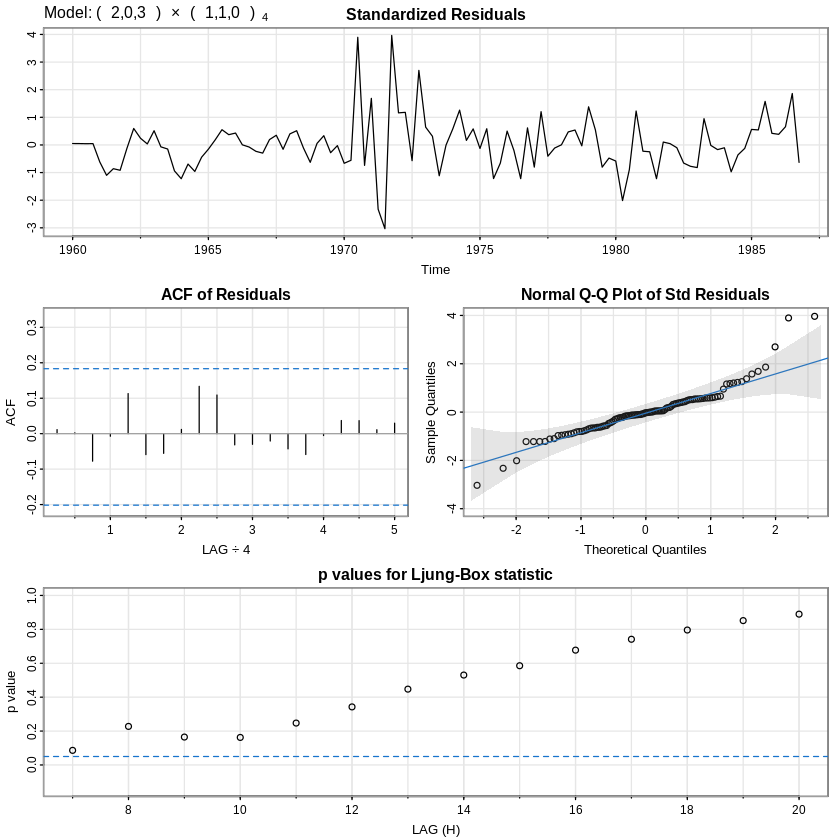

In [ ]:
# Step-06 Try ARIMA on log data with approximation set to FALSE

# Capture all output
model2 <- capture.output(sarima(log_UKGas, 2,0,3,1,1,0,4))

# Filter out convergence details
filtered_output <- grep("iter|value|converged", model2, invert=TRUE, value=TRUE)

# Display filtered output
cat(filtered_output, sep="\n")



**Findings Summary for SARIMA Model1 (ARIMA(2,0,3)(1,1,0)[4] on log transformed Data)**


**Model Fitted**

* **Model: ARIMA(2,0,3)(1,1,0)[4]**
* **Coefficients:**
  * AR(1): 0.1512 (p-value: 0.3158)
  * AR(2): 0.6995 (p-value: 0.0000)
  * MA(1): -0.2867 (p-value: 0.0942)
  * MA(2): -0.7691 (p-value: 0.0000)
  * MA(3): 0.3360 (p-value: 0.0025)
  * SAR(1): -0.1866 (p-value: 0.0940)
  * Constant: 0.0163(p-value:0.0000)
  * Error Variance (σ²): 0.009587757

* **Selection Criteria:**

  * AIC: -1.647653
  * AICc: -1.636435

* **General ARIMA Equation:**

  * For an ARIMA(p,d,q) process with seasonal components:

$$
(1 - \phi_1 B - \phi_2 B^2)(1 - \Phi_1 B^s)X_t = (1 + \theta_1 B + \theta_2 B^2 + \theta_3 B^3)W_t
$$

Where:

$$
\phi_i \text{ are the non-seasonal autoregressive coefficients,}
$$

$$
\Phi_i \text{ are the seasonal autoregressive coefficients,}
$$

$$
\theta_i \text{ are the moving average coefficients,}
$$

$$
B \text{ is the backward shift operator,}
$$

$$
s \text{ is the seasonal period (here, } s = 4 \text{),}
$$

$$
W_t \text{ is the white noise term,}
$$

$$
\mu \text{ is the mean.}
$$

Substituting the estimated coefficients:

$$
(1 - 0.1512 B - 0.6995 B^2)(1 + 0.1866 B^4)X_t = (1 - 0.2867 B - 0.7691 B^2 + 0.3360 B^3)W_t
$$


**Diagnostics**

* **Standardized Residuals:**

  * The residuals fluctuate randomly around zero, indicating no obvious patterns or trends.

* **ACF of Residuals:**

  * The residual ACF shows minimal autocorrelation at all lags, with no significant spikes beyond the confidence bounds, suggesting the model adequately captures the autocorrelation structure.

* **Normal Q-Q Plot:**

  * The Q-Q plot indicates that the residuals are approximately normally distributed, with slight deviations in the tails.

* **Ljung–Box Test:**

  * The p-values for the Ljung–Box test are above the significance threshold, indicating no significant autocorrelation in the residuals.

**Interpretation and Conclusion**

* **Model Diagnostics:**

  * The ARIMA(2,0,3)(1,1,0)[4] model diagnostics confirm that it is a reasonable fit for the log-transformed data:
  * Residuals behave like white noise.
  * Residuals are approximately normally distributed.
  * The Ljung–Box test confirms no significant autocorrelation in the residuals.

* **Key Strengths:**

  * The model captures the main structure of the data effectively.
  * Residual diagnostics indicate no significant issues.

* **Significance of Coefficients:**

  * AR(2), MA(2), and MA(3) coefficients are statistically significant.
  * AR(1), MA(1), and SAR(1) coefficients have p-values above 0.1, indicating borderline significance.

**Final Verdict:**
* The ARIMA **(2,0,3)(1,1,0)[4] model for the log-transformed data** is satisfactory based on AIC/AICc, residual diagnostics, and the Ljung–Box test.
* However, the non-significance of AR(1), MA(1), and SAR(1) coefficients suggests that these terms may not be necessary.
* To evaluate this, an alternative model, ARIMA(1,0,2)(1,1,0)[4], was tested, removing the non-significant terms (AR(1) and MA(1)).
  * While the alternative model showed marginal improvement in AIC and AICc, its residual diagnostics and Q-Q plots were similar to the final model, with no significant enhancements in model adequacy.
  * **The complete analysis of ARIMA(1,0,2)(1,1,0)[4] is included in the Additional Analysis Documentation for reference, located at the end of the analysis (Page#33).**
* Retaining AR(1), MA(1), and SAR(1) coefficients ensures that the final model accounts for all potential structures in the dataset while maintaining interpretability and statistical reliability.
<br>
<br>

* **This comprehensive evaluation validates Log transformation ARIMA(2,0,3)(1,1,0)[4] as the final model for forecasting.**



<br>
<br>

$$
\begin{array}{c}
\textbf{End of SARIMA Model1 ARIMA (2,0,3) (1,1,0) [4] on Log transformed data} \\[-0.5ex]
\hline
\end{array}
$$


<br>

<br>




<br>
<br>

**Step-07:(S)ARIMA Forecast: ARIMA (2,0,3) (1,1,0) [4] on Log transformed data**

* **Step-07(a):** Generate a forecast for your fitted model using the forecast function,using an appropriate number of timesteps ahead. Discuss any interesting features that appear in the point forecasts and confidence intervals.
* **Step-07(b):** Back-Transform the Forecasts
<br>
<br>

**Step-07(a) Below forecasting is done with log_UKGas (log transformed dataset)**

Series: log_UKGas 
ARIMA(2,0,3)(1,1,0)[4] 

Coefficients:
         ar1     ar2      ma1      ma2     ma3     sar1
      0.2180  0.7640  -0.3207  -0.8073  0.3365  -0.1811
s.e.  0.1331  0.1328   0.1540   0.1036  0.1075   0.1093

sigma^2 = 0.01045:  log likelihood = 91.66
AIC=-169.32   AICc=-168.15   BIC=-150.81

Training set error measures:
                     ME       RMSE        MAE       MPE     MAPE      MASE
Training set 0.01362301 0.09735986 0.06575475 0.2256865 1.187348 0.7710271
                    ACF1
Training set -0.01235056

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1987 Q1       7.125972 6.994989 7.256955 6.925651 7.326293
1987 Q2       6.528734 6.397062 6.660407 6.327359 6.730110
1987 Q3       5.882247 5.750294 6.014200 5.680443 6.084052
1987 Q4       6.782310 6.646552 6.918068 6.574687 6.989934
1988 Q1       7.192971 7.019714 7.366227 6.927998 7.457943
1988 Q2       6.616409 6.442631 6.790187 6.350639 6.882179
1988 Q3       5.960344 5.786560 6.134127 5.694565 6.226123
1988 Q4       6.861197 6.681413 7.040980 6.586242 7.136152
1989 Q1       7.266816 7.050375 7.483257 6.935798 7.597834
1989 Q2       6.696074 6.478115 6.914034 6.362734 7.029415
1989 Q3       6.032722 5.814629 6.250814 5.699177 6.366266
1989 Q4       6.938772 6.712887 7.164658 6.593310 7.284234
1990 Q1       7.339576 7.079240 7.599912 6.941426 7.737725
1990 Q2       6.770611 6.507570 7.033652 6.368325 7.172898
1990 Q3       6.104819 5.841186 6.368452 5.701627 6.508011
1990 Q4       7.011272 6.738537 7.284006 6.594160 7.4283

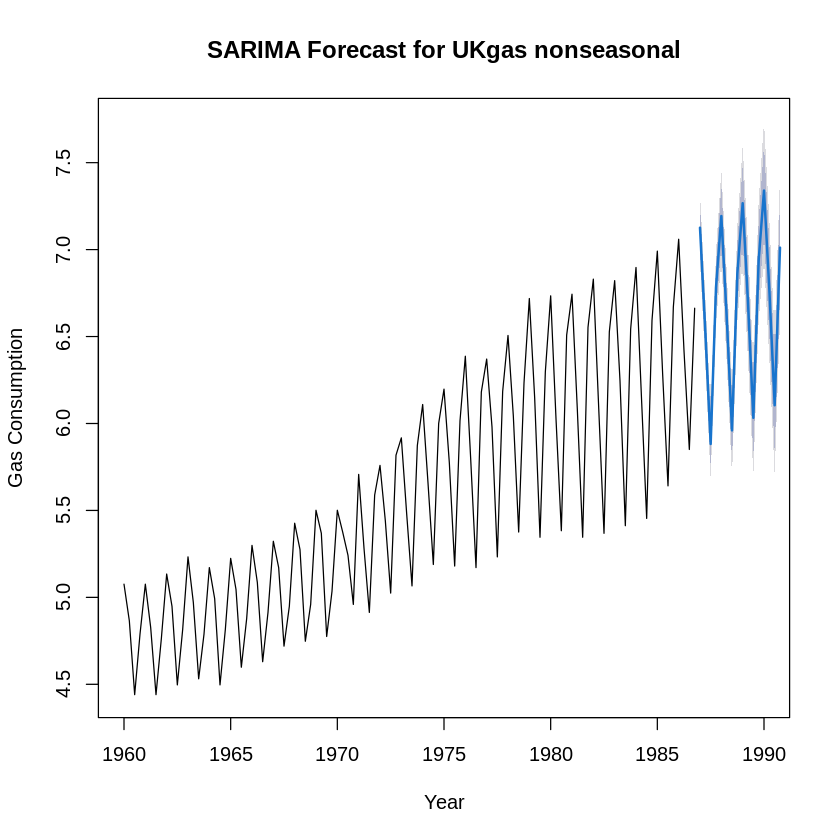

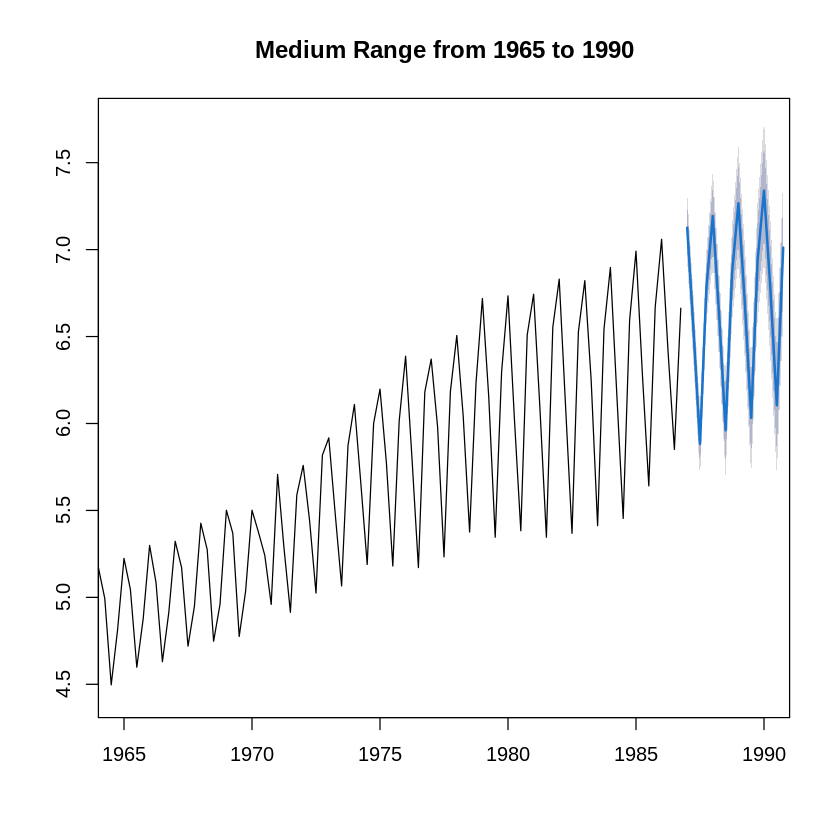

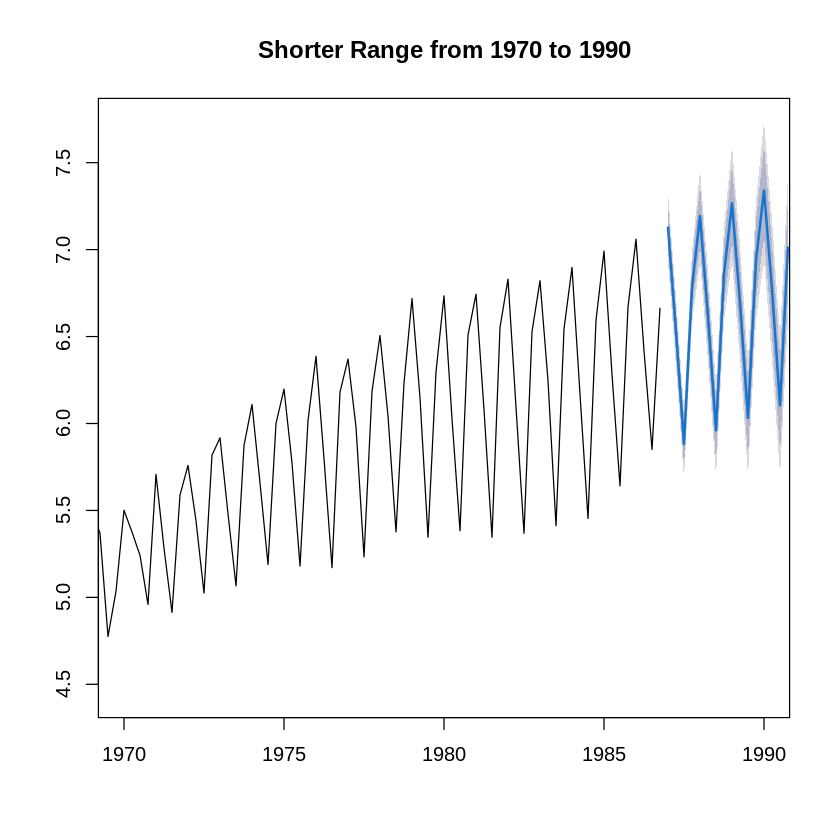

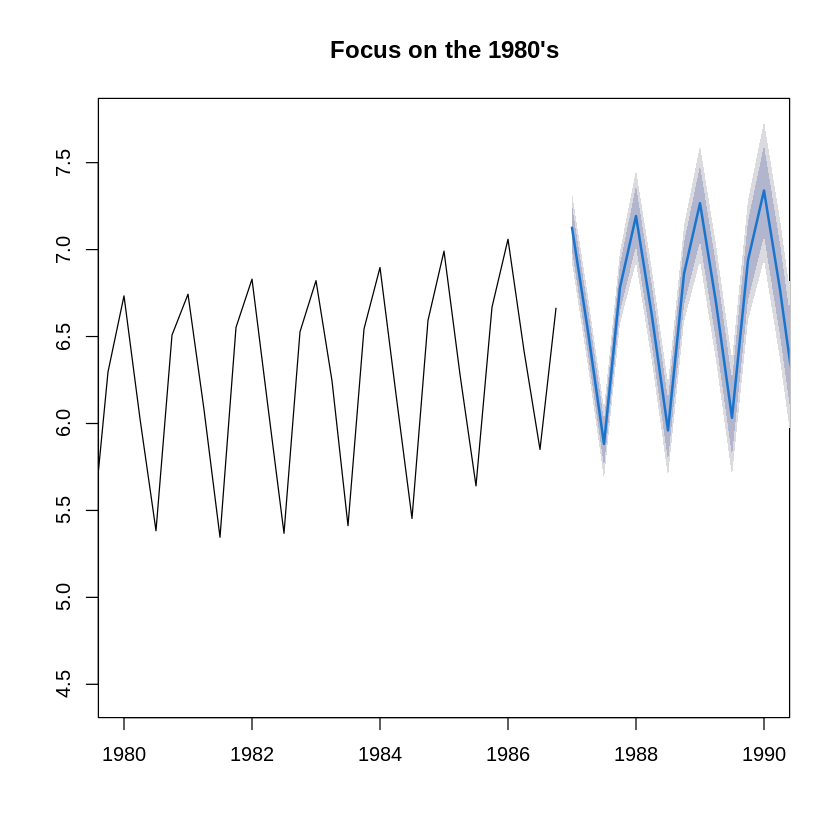

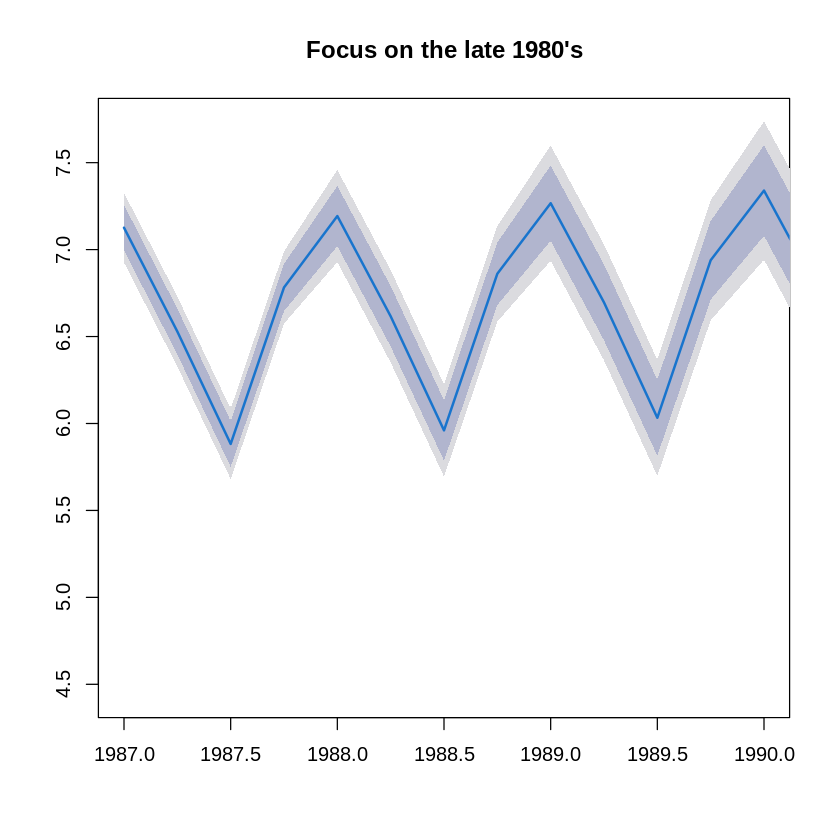

In [ ]:
library(forecast)
# Step-07(a): Fitting and Forecasting with SARIMA Model on Log-Transformed Data
# Fit an ARIMA(2, 0, 3)(1, 1, 0)[4] model to the log-transformed UKGas dataset
# The model includes seasonal components with a quarterly period (4)
# Selected based on the output of `auto.arima`


arima_model <- Arima(log_UKGas, order = c(2,0,3),
                      seasonal = list(order = c(1, 1, 0), period = 4))

# Summarize the fitted SARIMA model
# Includes estimated coefficients, selection criteria (AIC, BIC), and residual diagnostics

summary(arima_model)

# Step-07(a): Forecasting 16 steps ahead (4 years of quarterly data)
# Generate forecasts with 80% and 95% confidence intervals
log_UKGas.forecast <- forecast(arima_model, h = 16,level = c(80, 95))


# Plot the Forecast
log_UKGas.forecast
par(mfrow = c(1,1))
plot(log_UKGas.forecast , xlim = c(1960, 1990),
     main = "SARIMA Forecast for UKgas nonseasonal",
     ylab = "Gas Consumption", xlab = "Year")

# Zoom in on specific time ranges to examine forecast details
plot(log_UKGas.forecast, main= "Medium Range from 1965 to 1990",xlim = c(1965, 1990))  # Medium range
plot(log_UKGas.forecast, main= "Shorter Range from 1970 to 1990",xlim = c(1970, 1990))  # Shorter range
plot(log_UKGas.forecast, main= "Focus on the 1980's",xlim = c(1980, 1990))  # Focus on the 1980s
plot(log_UKGas.forecast,main= "Focus on the late 1980's", xlim = c(1987, 1990))  # Focus on the late 1980s


	Ljung-Box test

data:  Residuals from ARIMA(2,0,3)(1,1,0)[4]
Q* = 4.7445, df = 3, p-value = 0.1915

Model df: 6.   Total lags used: 9



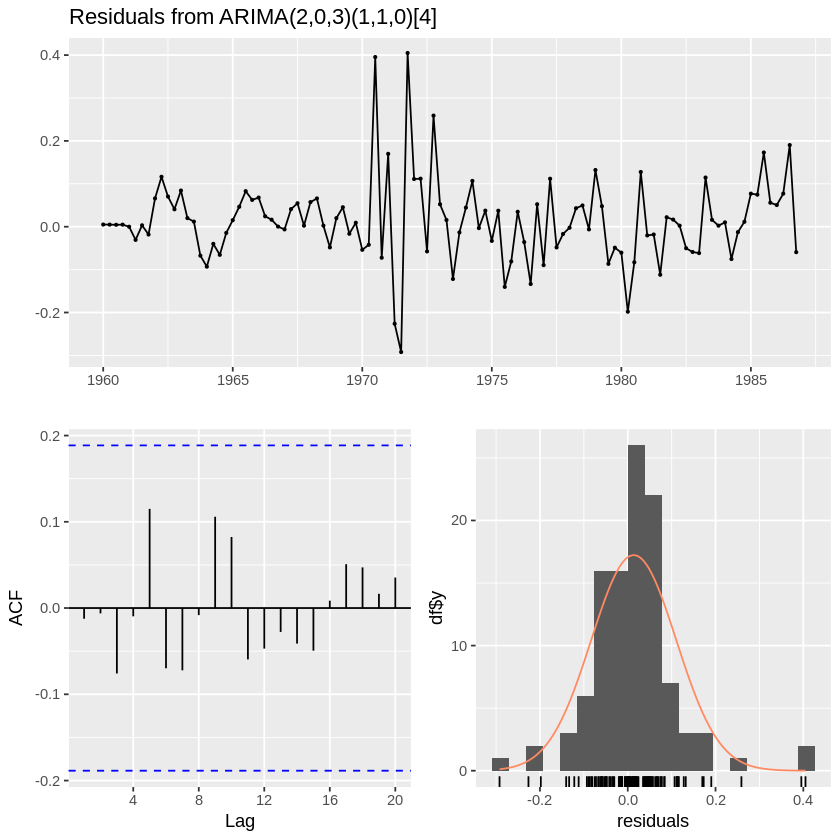

In [ ]:
# Step-07(a): Residual Diagnostics for SARIMA Model
# Assess the residuals of the fitted SARIMA model (arima_model) to evaluate model adequacy
# This includes:
# - Plotting the residuals to check for randomness
# - An ACF plot of residuals to check for autocorrelation
# - Conducting the Ljung-Box test to statistically assess residual autocorrelation

checkresiduals(arima_model)


<br>

**Step-07(b) Back-Transform the Forecasts:**
* **Step-A:** The forecasts generated using a log-transformed dataset are in the log scale. To revert them to the original scale, I am using the exponentiate the point forecasts and the confidence intervals.

<br>

In [ ]:
#Step-07(b)
# Back-transform the point forecasts and confidence intervals
original_scale_forecast <- exp(log_UKGas.forecast$mean)
original_scale_lower_80 <- exp(log_UKGas.forecast$lower[, 1])  # 80% lower bound
original_scale_upper_80 <- exp(log_UKGas.forecast$upper[, 1])  # 80% upper bound
original_scale_lower_95 <- exp(log_UKGas.forecast$lower[, 2])  # 95% lower bound
original_scale_upper_95 <- exp(log_UKGas.forecast$upper[, 2])  # 95% upper bound

# Create a data frame to store the results for reporting
backtransformed_forecast <- data.frame(
  Time = time(log_UKGas.forecast$mean),
  Point_Forecast = original_scale_forecast,
  Lower_80 = original_scale_lower_80,
  Upper_80 = original_scale_upper_80,
  Lower_95 = original_scale_lower_95,
  Upper_95 = original_scale_upper_95
)

print(backtransformed_forecast)



      Time Point_Forecast  Lower_80  Upper_80  Lower_95  Upper_95
1  1987.00      1243.8563 1091.1515 1417.9320 1018.0564 1519.7376
2  1987.25       684.5313  600.0796  780.8683  559.6767  837.2390
3  1987.50       358.6142  314.2832  409.1983  293.0792  438.8034
4  1987.75       882.1043  770.1247 1010.3662  716.7209 1085.6498
5  1988.00      1330.0483 1118.4669 1581.6548 1020.4489 1733.5789
6  1988.25       747.2570  628.0573  889.0797  572.8586  974.7483
7  1988.50       387.7434  325.8901  461.3363  297.2474  505.7906
8  1988.75       954.5086  797.4453 1142.5069  725.0507 1256.5834
9  1989.00      1431.9836 1153.2911 1778.0220 1028.4396 1993.8719
10 1989.25       809.2228  650.7429 1006.2985  579.8293 1129.3696
11 1989.50       416.8480  335.1669  518.4349  298.6217  581.8809
12 1989.75      1031.5029  822.9427 1292.9189  730.1938 1457.1449
13 1990.00      1540.0585 1187.0657 1998.0192 1034.2443 2293.2495
14 1990.25       871.8448  670.1961 1134.1655  583.0803 1303.6169
15 1990.50

<br>

**Step-07(b) Visualize the Back-Transformed Forecast:**

* **Step-B:** To visualize the forecasts in the original scale, plot the back-transformed values:

<br>


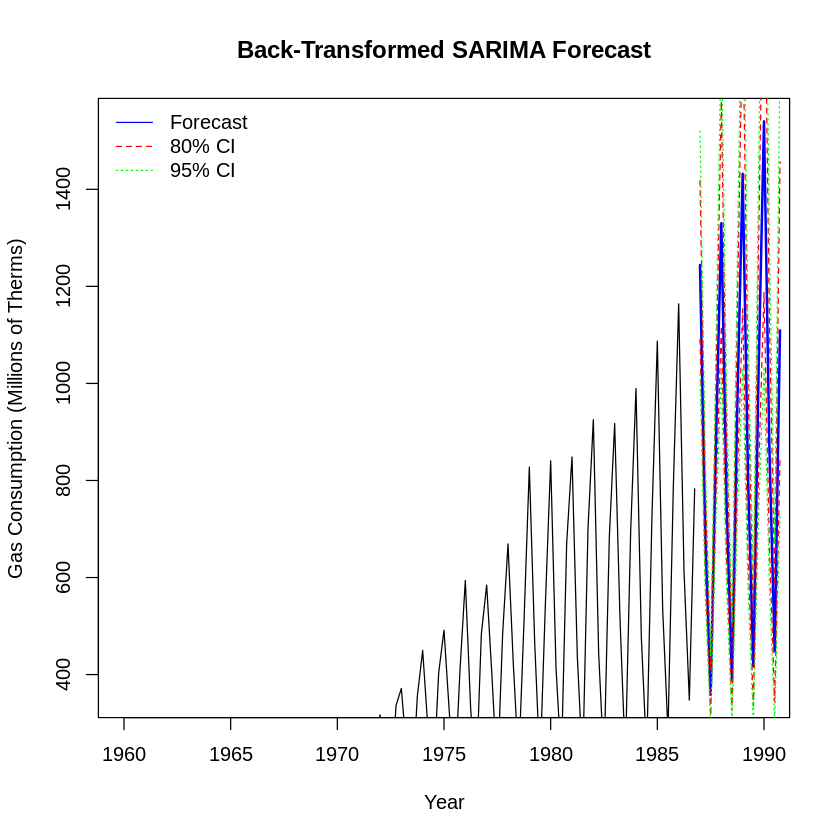

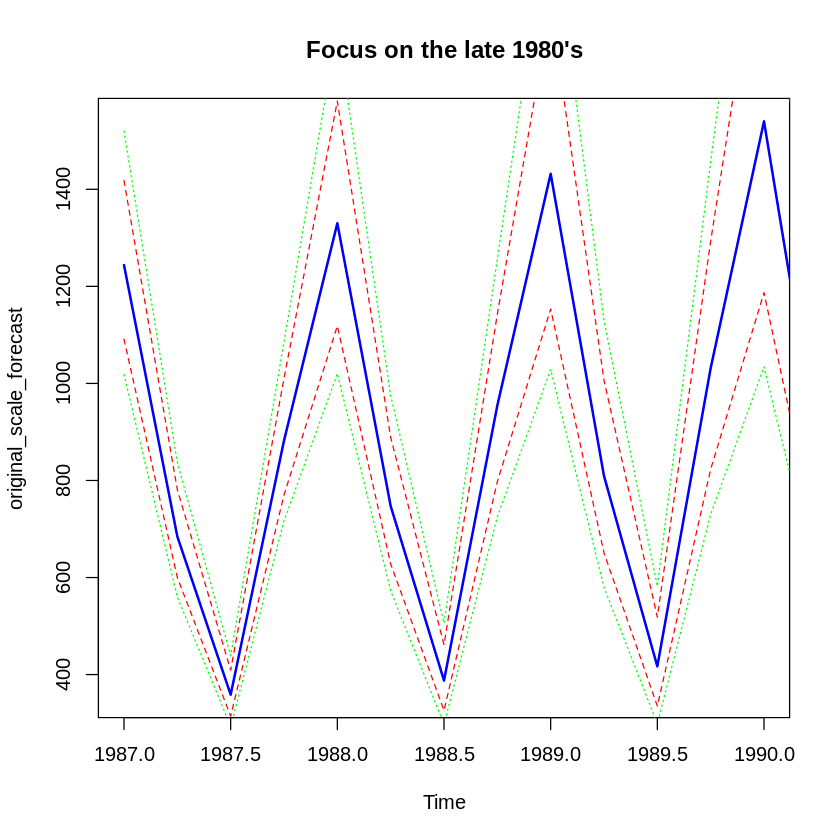

In [ ]:
# Plot the back-transformed forecast - Step-B
plot(exp(log_UKGas), xlim = c(1960, 1990), ylim = range(original_scale_forecast, na.rm = TRUE),
     main = "Back-Transformed SARIMA Forecast", xlab = "Year", ylab = "Gas Consumption (Millions of Therms)")
lines(original_scale_forecast, col = "blue", lwd = 2)  # Point forecasts
lines(original_scale_lower_80, col = "red", lty = 2)  # 80% lower bound
lines(original_scale_upper_80, col = "red", lty = 2)  # 80% upper bound
lines(original_scale_lower_95, col = "green", lty = 3)  # 95% lower bound
lines(original_scale_upper_95, col = "green", lty = 3)  # 95% upper bound

legend("topleft", legend = c("Forecast", "80% CI", "95% CI"),
       col = c("blue", "red", "green"), lty = c(1, 2, 3), bty = "n")

# Zoom in on specific time ranges to examine forecast details

plot(original_scale_forecast,main= "Focus on the late 1980's", xlim = c(1987, 1990))  # Focus on the late 1980s
lines(original_scale_forecast, col = "blue", lwd = 2)  # Point forecasts
lines(original_scale_lower_80, col = "red", lty = 2)  # 80% lower bound
lines(original_scale_upper_80, col = "red", lty = 2)  # 80% upper bound
lines(original_scale_lower_95, col = "green", lty = 3)  # 95% lower bound
lines(original_scale_upper_95, col = "green", lty = 3)  # 95% upper bound

**Step-07 Forecasting findings Summary for SARIMA Model (ARIMA(2,0,3)(1,1,0)[4] on Log-Transformed Data)**

**Diagnostics**

* **Standardized Residuals:**

  * The residuals fluctuate randomly around zero, indicating no obvious patterns or trends.

* **ACF of Residuals:**

  * The residual ACF shows minimal autocorrelation at all lags, with no significant spikes beyond the confidence bounds, suggesting the model adequately captures the autocorrelation structure.

* **Ljung–Box Test:**

  * The p-value is 0.1915 - It doesn't give the lags to compute the p value, but in general if this is above the significance level 0.1, then the residuals are uncorrelated, suggesting a good fit of the model.



**Forecasting**

* **Point Forecasts and Confidence Intervals:**

  * The model provides point forecasts along with 80% and 95% confidence intervals for each quarter from 1987 Q1 to 1990 Q4.
  * The forecasts exhibit a seasonal pattern consistent with the historical data.
  * The confidence intervals widen as the forecast horizon increases, reflecting increasing uncertainty over time.

* **Back-Transformed Forecasts:**

  * Since the model was fitted on log-transformed data, the forecasts are in the log scale.
  * Exponentiating the forecasts will provide predictions in the original scale of gas consumption.
    * The forecasts generated using the SARIMA model on the log-transformed data were back-transformed to the original scale using exponentiation.
    * The back-transformed forecasts and their 80% and 95% confidence intervals are shown above. These values represent the predicted gas consumption in millions of therms, aligning with the original scale of the dataset."

**Conclusion**

* The SARIMA model ARIMA(2,0,3)(1,1,0)[4] on log-transformed data provides a reasonable fit and reliable forecasts for UK gas consumption.
* The model captures both seasonal and non-seasonal patterns effectively, and diagnostic checks confirm the adequacy of the model.
* The forecasts indicate a continuation of the seasonal pattern observed in the historical data, with increasing uncertainty as the forecast horizon extends.


$$
\begin{array}{c}
\textbf{End of Step-07, Forecasting findings summary on Log-Transformed Data and Back Transformed Data} \\[-0.5ex]
\hline
\end{array}
$$

<br>
<br>


<br>
<br>

**Step-08: Exponential Smoothing Fit**

**Step-08(a) Exponential Smoothing Fit: "Running Log Transformed Data"**

* Fit an exponential smoothing model to your dataset. Explicitly write down the model parameters
that R generates and give a brief discussion of their meaning.
* Run model diagnostics and discuss their implications.

**The Exponential Smoothing Forecast:**
  * Generate and plot a forecast using your exponential smoothing
fit. To demonstrate that you understand how the point forecasts are computed, explicitly write out a
consistency check for at least two of the point forecast values. That is, interrogate your forecast and print
a few point forecast values, then reproduce those values manually, using parameters from your fitted
model.

**Step-08(b) Back transforming HoltWinters exponential smoothing forecasts**


<br>
<br>

**Below Exponential Smoothing fit is done with log_UKGas (log transformed dataset)**

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log_UKGas)

Smoothing parameters:
 alpha: 0.02902249
 beta : 1
 gamma: 0.7246027

Coefficients:
          [,1]
a   6.35670491
b   0.02234170
s1  0.76212717
s2  0.08604617
s3 -0.53107110
s4  0.32905534


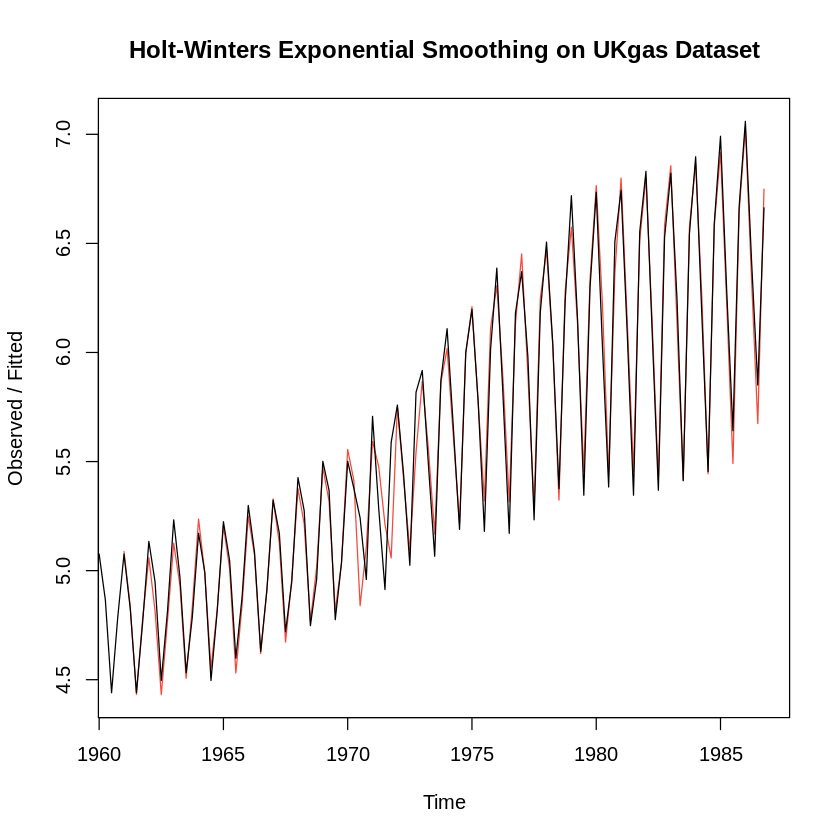

In [ ]:
# Step-08(a): Fit the Holt-Winters Model
# Use the Holt-Winters exponential smoothing method to model the log-transformed UKGas dataset
# This method accounts for level, trend, and seasonality in the data.


UKGas.fit.HW <- HoltWinters(log_UKGas)

# Print the fitted model details
print(UKGas.fit.HW)

# Plot the fitted model with observed values
plot(UKGas.fit.HW, main = "Holt-Winters Exponential Smoothing on UKgas Dataset")


**Findings Summary for Log Transformed Data:** **Exponential Smoothing Model Parameters**

**1. Fitted Exponential Smoothing Model:**

  * The exponential smoothing model fitted to the dataset is the Holt-Winters additive model. This includes level, trend, and seasonality components.

**2. Parameters Generated by R:**
* **Smoothing Parameters:**

    * **Alpha (α = 0.029):** Controls the rate at which the level (overall average) is updated. A small value means that the level is less sensitive to recent changes.
    * **Beta (β = 1):** Controls the rate of updating the trend. A value of 1 indicates a strong influence of recent data on the trend component.

    * **Gamma (γ = 0.725):** Determines how quickly the seasonal components are updated. A higher value indicates that seasonality is more adaptive to recent changes.

* **Model Coefficients:**

  * **Level (a = 6.3567):** Represents the baseline (overall level) of the dataset at the final observation.
  * **Trend (b = 0.0223):** Indicates the overall direction of the dataset. A positive trend suggests an increasing pattern over time.
  * **Seasonal Components (s1, s2, s3, s4):**
    * s1 = 0.7621: Seasonal adjustment for the first quarter.
    * s2 = 0.0860: Seasonal adjustment for the second quarter.
    * s3 = -0.5311: Seasonal adjustment for the third quarter.
    * s4 = 0.3290: Seasonal adjustment for the fourth quarter.

  * These seasonal components capture the periodic fluctuations in the dataset.

**3. Interpretation of Parameters:**

* **Smoothing Parameters:**

    * **Alpha (Level):** A low value suggests that the model considers the historical data strongly when estimating the current level. This stabilizes the level component and reduces the impact of sudden changes.
    * **Beta (Trend):** A high value shows that the model prioritizes recent observations when updating the trend, making it sensitive to recent directional changes.
    * **Gamma (Seasonality):** A relatively high gamma indicates that seasonal patterns are updated frequently, allowing the model to adapt to shifts in seasonal behavior.

* **Model Coefficients:**

  * **Level (a):** Indicates the average log gas consumption at the most recent time point (end of the dataset).
  * **Trend (b):** The data exhibits a slight upward trend in log gas consumption.
  * **Seasonality (s1, s2, s3, s4):**
    * **Q1 (s1): Gas consumption is highest in the first quarter.**
    * **Q3 (s3): Gas consumption drops significantly in the third quarter.**

**4. Conclusion:**

* The exponential smoothing model effectively captures the underlying patterns in the dataset, including a slight upward trend and seasonal fluctuations. The smoothing parameters indicate that while the level is stable, the model is adaptive to changes in trend and seasonal patterns. This adaptability is essential for accurately forecasting future gas consumption.

<br>
<br>

$$
\begin{array}{c}
\textbf{End of Exponential Smoothing Model Parameters Discussion} \\[-0.5ex]
\hline
\end{array}
$$
<br>
<br>


**Step-08(a) Running Log transformation HoltWinters (UKGas.fit.HW) model diagnostics and discuss their implications.**
<br>



	Ljung-Box test

data:  Residuals from HoltWinters
Q* = 10.942, df = 8, p-value = 0.205

Model df: 0.   Total lags used: 8



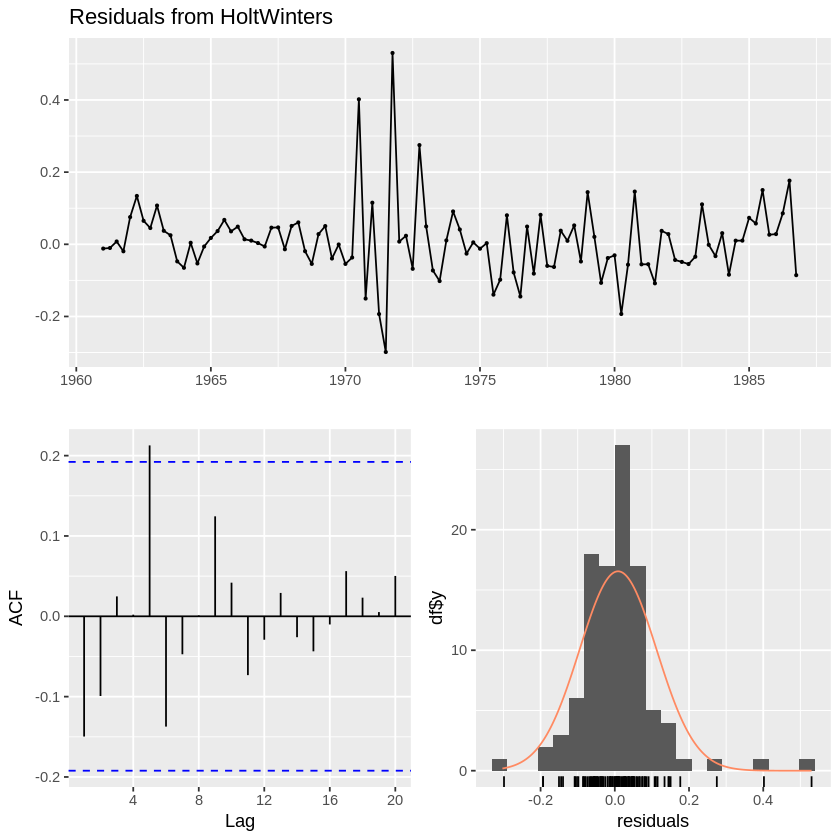

In [ ]:
# Step-8(a): Residual Diagnostics for Holt-Winters Model
# Evaluate the residuals from the Holt-Winters model to check for model adequacy.
# The checkresiduals function examines residual patterns, normality, and autocorrelation.

checkresiduals(UKGas.fit.HW)

**Step-08(a) Model Diagnostics and Summary of the log transformation Hotlwinters UKGas.fit.HW data**

**Residual Analysis:**
* The diagnostic plots and residual checks for the Holt-Winters Exponential Smoothing Model (checkresiduals(UKGas.fit.HW)) provide important insights into the model's performance. Here is the summary:

**1. Residual Time Series Plot (HoltWinters):**
* The residuals fluctuate randomly around zero, indicating that the model has captured most of the systematic variation in the data.
* No obvious patterns or trends are visible, suggesting that the residuals are close to white noise.
* There is a noticeable spike around the early 1970s, corresponding to a potential structural change or outlier in the data.

**2. Autocorrelation Function (ACF) Plot:**
* The ACF plot shows the autocorrelations of the residuals across different lags.
* A significant spike is observed at lag 6, which crosses the confidence bounds.

* Most other lags fall within the 95% confidence interval, which indicates that the residuals exhibit little autocorrelation overall.

**3. Histogram and Normality Check:**
* The histogram of residuals approximates a normal distribution, with the density curve (in orange) fitting the histogram reasonably well.
* However, there are some deviations in the tails, suggesting slight non-normality. This could indicate the presence of outliers or non-linear patterns in the data not captured by the model.

**4. Ljung-Box Test:**
* The Ljung-Box test checks for the presence of autocorrelation in the residuals. The results are: Q∗ = 10.942, df=8, p-value=0.205.

* **Interpretation:**
* The p-value is 0.205, which is above the standard thresholds (e.g. 0.1).
* This indicates that the residuals do not exhibit significant autocorrelation overall, supporting the adequacy of the model.

**Implications**

**1. Model Strengths:**

* The model performs well in capturing the primary structure of the data, as indicated by the random fluctuation of residuals around zero and the non-significant p-value from the Ljung-Box test.
* The residuals show minimal autocorrelation, except for the spike at lag 6.

**2. Model Weaknesses:**

* The spike at lag 6 in the ACF suggests the possibility of missing temporal patterns at that lag.
* The slight deviations from normality in the residual histogram could be due to outliers or non-linearities not accounted for by the additive Holt-Winters model.

**Conclusion:**
* While the Holt-Winters model provides a good fit overall, with acceptable diagnostics and no significant residual autocorrelation. This model is reasonable for forecasting.

<br>
<br>

$$
\begin{array}{c}
\textbf{End of Model Diagnostics and Summary of the log transformation Hotlwinters UKGas.fit.HW} \\[-0.5ex]
\hline
\end{array}
$$
<br>
<br>


**Step-08(a) Next Step: Running the exponential Smoothing Forecast on Log transformation HoltWinters (UKGas.fit.HW):**

* The Exponential Smoothing Forecast. Generate and plot a forecast using your exponential smoothing fit.

* To demonstrate that you understand how the point forecasts are computed, explicitly write out a consistency check for at least two of the point forecast values. That is, interrogate your forecast and print
a few point forecast values, then reproduce those values manually, using parameters from your fitted model.
<br>


        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1987 Q1       7.141174 7.008031 7.274317 6.937549 7.344798
1987 Q2       6.487434 6.354067 6.620802 6.283467 6.691402
1987 Q3       5.892659 5.758789 6.026529 5.687922 6.097395
1987 Q4       6.775127 6.640368 6.909886 6.569030 6.981224
1988 Q1       7.230541 7.054676 7.406405 6.961579 7.499502
1988 Q2       6.576801 6.399415 6.754187 6.305513 6.848090
1988 Q3       5.982026 5.802589 6.161462 5.707601 6.256450
1988 Q4       6.864494 6.682414 7.046574 6.586027 7.142961
1989 Q1       7.319907 7.097077 7.542738 6.979118 7.660697
1989 Q2       6.666168 6.440012 6.892324 6.320293 7.012043
1989 Q3       6.071392 5.841277 6.301508 5.719461 6.423324
1989 Q4       6.953861 6.719120 7.188602 6.594855 7.312866
1990 Q1       7.409274 7.133932 7.684616 6.988175 7.830374
1990 Q2       6.755535 6.474929 7.036141 6.326385 7.184685
1990 Q3       6.160759 5.874229 6.447289 5.722549 6.598969
1990 Q4       7.043227 6.750103 7.336352 6.594932 7.4915

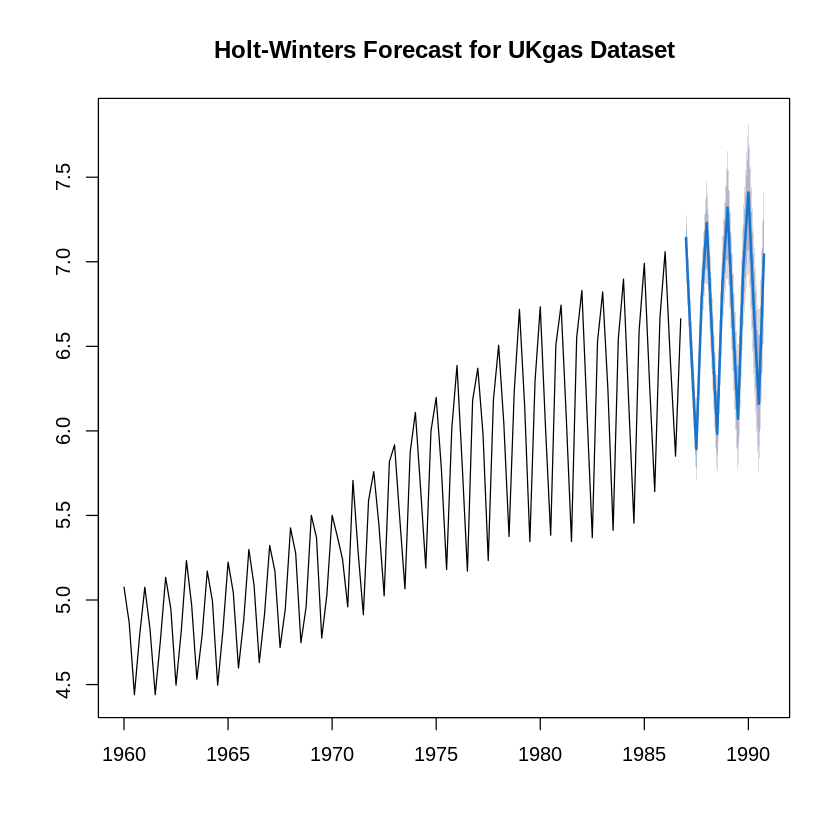

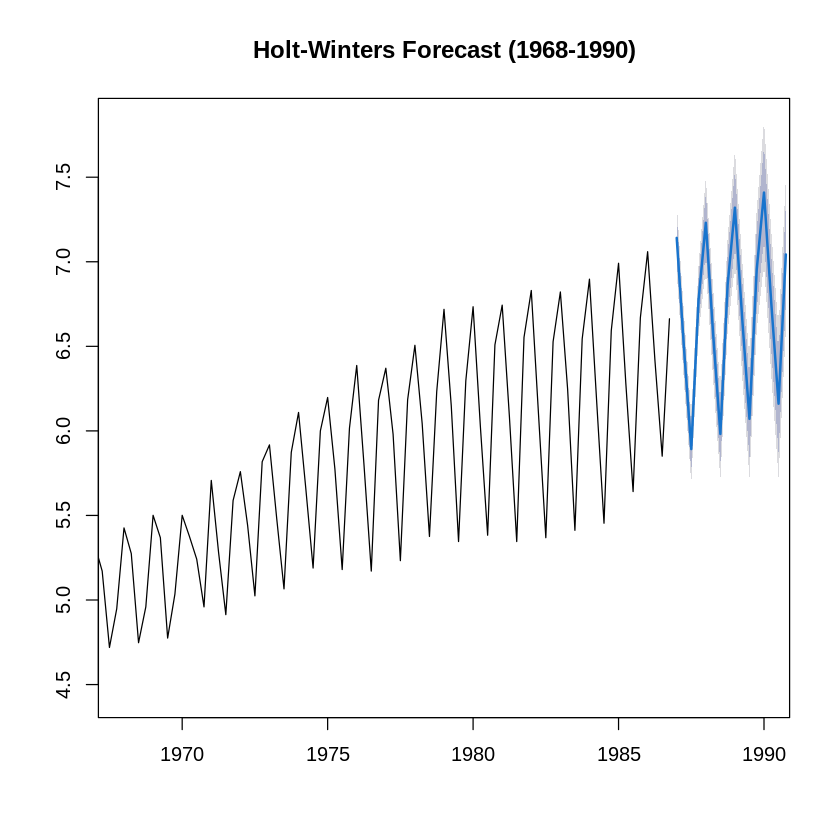

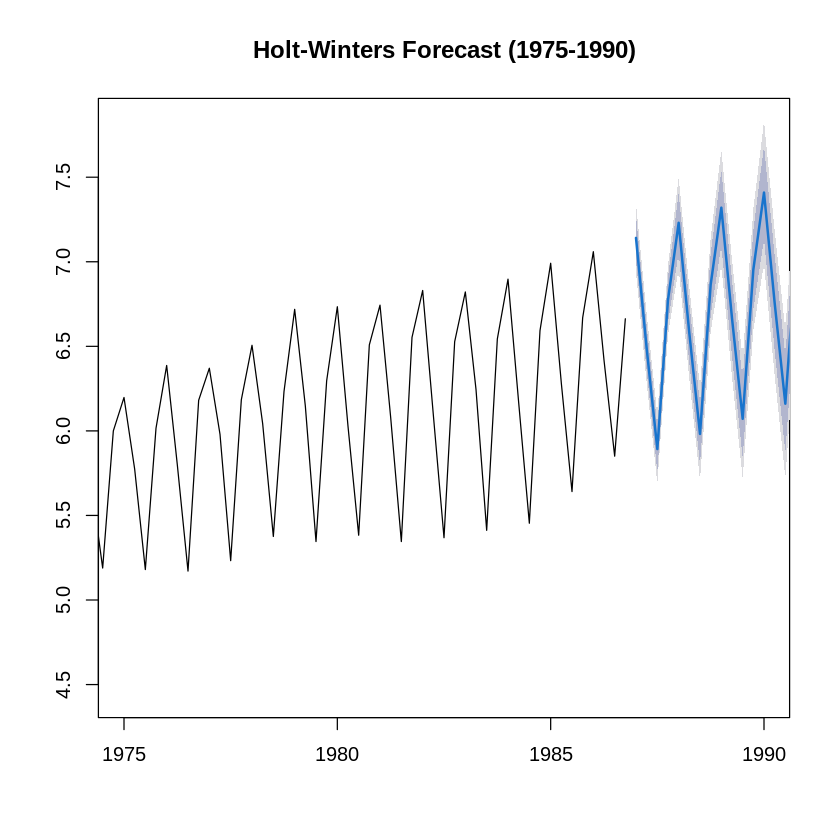

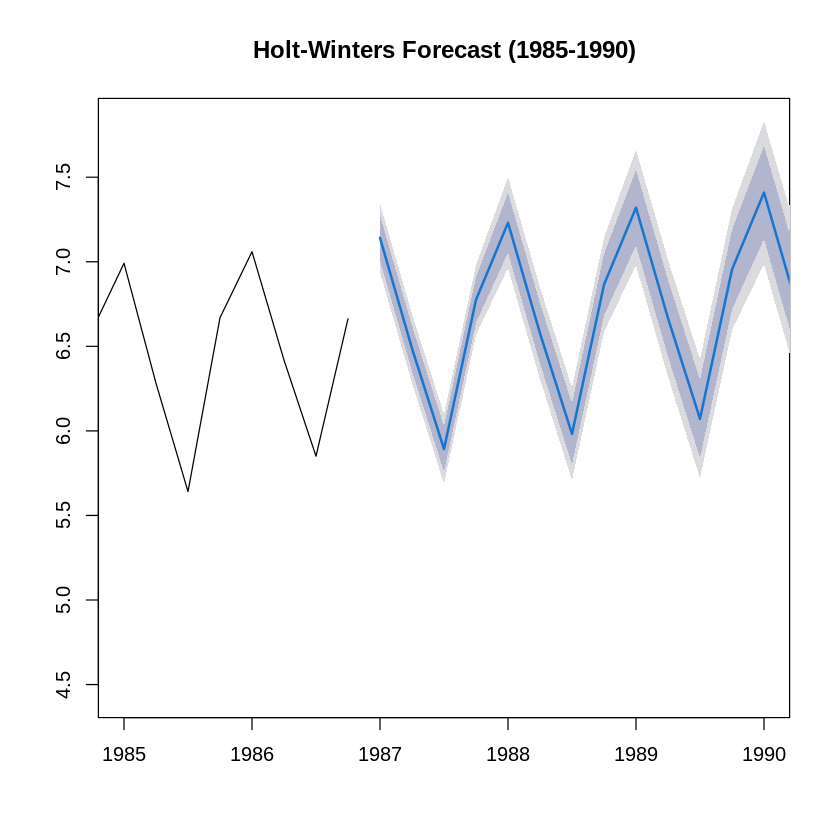

In [ ]:
# Step-08(a): Forecasting with Holt-Winters Exponential Smoothing Model
# Generate a 16-step-ahead forecast using the Holt-Winters model fitted to the log-transformed data (UKGas.fit.HW).
# Visualize the forecast along with confidence intervals at different zoom levels to observe long-term trends and patterns.

UKGas.forecast.HW <- forecast(UKGas.fit.HW, h = 16)  # Generate forecast for 16 quarters
UKGas.forecast.HW  # Display forecasted values and confidence intervals

par(mfrow = c(1,1))  # Set plotting layout to single panel
plot(UKGas.forecast.HW, main = "Holt-Winters Forecast for UKgas Dataset")  # Full forecast plot
plot(UKGas.forecast.HW, xlim = c(1968, 1990), main = "Holt-Winters Forecast (1968-1990)")  # Zoomed-in view
plot(UKGas.forecast.HW, xlim = c(1975, 1990), main = "Holt-Winters Forecast (1975-1990)")  # Further zoomed-in view
plot(UKGas.forecast.HW, xlim = c(1985, 1990), main = "Holt-Winters Forecast (1985-1990)")  # Final zoomed-in view


**Step-08(a) Forecast Plots with Exponential Smoothing Forecast Using Holt-Winters Method on Log Transformed Data:**

* The forecast plots visually extend the original time series with predicted values and 80% and 95% confidence intervals.
* The forecasts maintain the seasonal patterns of the original series while accommodating the increasing trend.

<br>
<br>

**Step-08(a)Below plots are to compare the Log transformed ARIMA Forecasts and exponential smoothing forecasts:**
<br>

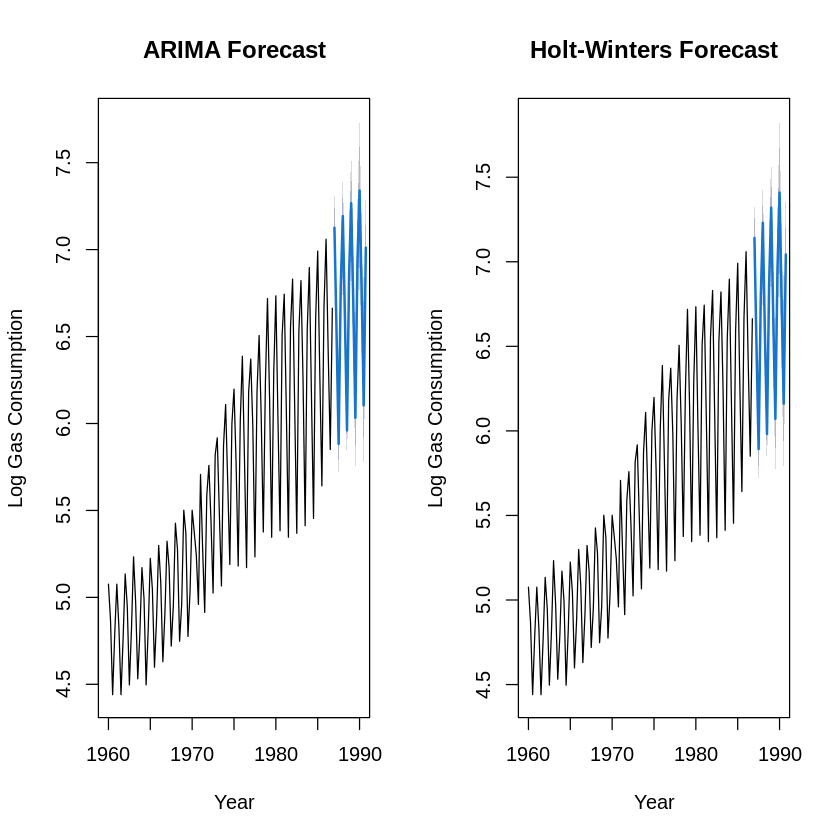

In [ ]:
# Step-08(a): Comparison of Forecasts
# Compare the log-transformed ARIMA(2,0,3)(1,1,0)[4] forecasts and Holt-Winters exponential smoothing forecasts.
# This side-by-side visualization helps identify similarities and differences in trends, seasonal patterns, and confidence intervals.

par(mfrow = c(1,2))  # Set layout to two plots side-by-side
plot(log_UKGas.forecast, xlim = c(1960, 1990), main = "ARIMA Forecast",
     xlab = "Year", ylab = "Log Gas Consumption")  # Plot ARIMA forecast
plot(UKGas.forecast.HW, xlim = c(1960, 1990), main = "Holt-Winters Forecast",
     xlab = "Year", ylab = "Log Gas Consumption")  # Plot Holt-Winters forecast


**Step-08(a) Above comparison with Log transformed ARIMA Forecasts and exponential smoothing forecasts:**

* A side-by-side comparison of log transformed ARIMA(2,0,3)(1,1,0)[4] and Holt-Winters forecasts reveals striking similarities in patterns and trends.
* Both models handle seasonality well, but their confidence intervals vary slightly.

In [ ]:
# Extracting Holt-Winters Coefficients
# This command retrieves the final level, trend, and seasonal components
# from the Holt-Winters model fitted to the log-transformed UKGas dataset.
# These coefficients are used for manual forecast calculations and interpretation.

UKGas.fit.HW$coefficients


a           b          s1          s2          s3          s4 
 6.35670491  0.02234170  0.76212717  0.08604617 -0.53107110  0.32905534

<br>
<br>

**Step-08(a) Printing out a few point forecast values:**

In [ ]:
# Manual Forecast Calculations Using Holt-Winters Parameters
# Extract key components from the fitted Holt-Winters model:
a <- UKGas.fit.HW$coefficients[1]  # Final level (a_t)
b <- UKGas.fit.HW$coefficients[2]  # Final trend (b_t)
s <- UKGas.fit.HW$coefficients[-c(1, 2)]  # Seasonal components (s_t)
T <- 4  # Quarterly data (seasonal period length)

# Calculate manual forecast for Q2 1987 (m = 2):
m <- 2  # Forecast horizon
seasonal_index <- (m - 1) %% T + 1  # Seasonal index for m-step ahead
manual_forecast_Q2_1987 <- a + m * b + s[seasonal_index]
cat("Manual Forecast for Q2 1987:", manual_forecast_Q2_1987, "\n")

# Calculate manual forecast for Q1 1988 (m = 5):
m <- 5  # Forecast horizon
seasonal_index <- (m - 1) %% T + 1  # Seasonal index for m-step ahead
manual_forecast_Q1_1988 <- a + m * b + s[seasonal_index]
cat("Manual Forecast for Q1 1988:", manual_forecast_Q1_1988, "\n")

# Calculate manual forecast for Q1 1989 (m = 9):
m <- 9  # Forecast horizon
seasonal_index <- (m - 1) %% T + 1  # Seasonal index for m-step ahead
manual_forecast_Q1_1989 <- a + m * b + s[seasonal_index]
cat("Manual Forecast for Q1 1989:", manual_forecast_Q1_1989, "\n")

# Purpose: Validate the forecast function by manually reproducing specific forecasted values
# using the extracted parameters and seasonal index adjustments.


Manual Forecast for Q2 1987: 6.487434 
Manual Forecast for Q1 1988: 7.230541 
Manual Forecast for Q1 1989: 7.319907 


In [ ]:
# Displaying the full exponential smoothing forecast:
# This command outputs the point forecasts along with the lower and upper confidence intervals (80% and 95%)
# for the next 16 quarters based on the Holt-Winters model.
UKGas.forecast.HW

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1987 Q1       7.141174 7.008031 7.274317 6.937549 7.344798
1987 Q2       6.487434 6.354067 6.620802 6.283467 6.691402
1987 Q3       5.892659 5.758789 6.026529 5.687922 6.097395
1987 Q4       6.775127 6.640368 6.909886 6.569030 6.981224
1988 Q1       7.230541 7.054676 7.406405 6.961579 7.499502
1988 Q2       6.576801 6.399415 6.754187 6.305513 6.848090
1988 Q3       5.982026 5.802589 6.161462 5.707601 6.256450
1988 Q4       6.864494 6.682414 7.046574 6.586027 7.142961
1989 Q1       7.319907 7.097077 7.542738 6.979118 7.660697
1989 Q2       6.666168 6.440012 6.892324 6.320293 7.012043
1989 Q3       6.071392 5.841277 6.301508 5.719461 6.423324
1989 Q4       6.953861 6.719120 7.188602 6.594855 7.312866
1990 Q1       7.409274 7.133932 7.684616 6.988175 7.830374
1990 Q2       6.755535 6.474929 7.036141 6.326385 7.184685
1990 Q3       6.160759 5.874229 6.447289 5.722549 6.598969
1990 Q4       7.043227 6.750103 7.336352 6.594932 7.4915

**The above values match the forecasted values provided by the forecast() function.**

<br>

<br>

<br>

**Step-08(b) Back-transform the Holt-Winters exponential smoothing forecasts:**

* **Forecasts are on the Log Scale:** Since the Holt-Winters model was applied to the log-transformed data, the resulting forecasts are in the log scale. To interpret the forecasts in the original scale (e.g., gas consumption in millions of therms), you need to exponentiate the results.

* **Here is how the back transformation works:**
  * Use the exponential function to revert the point forecasts to the original scale

* **Visualization on the Original Scale:**

  * Plot the back-transformed forecasts and confidence intervals along with the original data (on the original scale). This ensures the visualizations are interpretable for stakeholders.

      Time Point_Forecast  Lower_80  Upper_80  Lower_95  Upper_95
1  1987.00      1262.9099 1105.4755 1442.7651 1030.2422 1548.1228
2  1987.25       656.8361  574.8260  750.5465  535.6426  805.4506
3  1987.50       362.3675  316.9642  414.2745  295.2795  444.6980
4  1987.75       875.7906  765.3764 1002.1333  712.6786 1076.2345
5  1988.00      1380.9688 1158.2624 1646.4964 1055.2988 1807.1421
6  1988.25       718.2382  601.4932  857.6425  547.5823  942.0797
7  1988.50       396.2422  331.1559  474.1208  301.1478  521.3649
8  1988.75       957.6610  798.2437 1148.9155  724.8949 1265.1690
9  1989.00      1510.0641 1208.4299 1886.9886 1073.9708 2123.2361
10 1989.25       785.3803  626.4145  984.6870  555.7356 1109.9203
11 1989.50       433.2836  344.2186  545.3937  304.7407  616.0473
12 1989.75      1047.1847  828.0882 1324.2500  731.3231 1499.4684
13 1990.00      1651.2274 1253.7973 2174.6353 1083.7416 2515.8691
14 1990.25       858.7990  648.6729 1136.9916  559.1315 1319.0738
15 1990.50

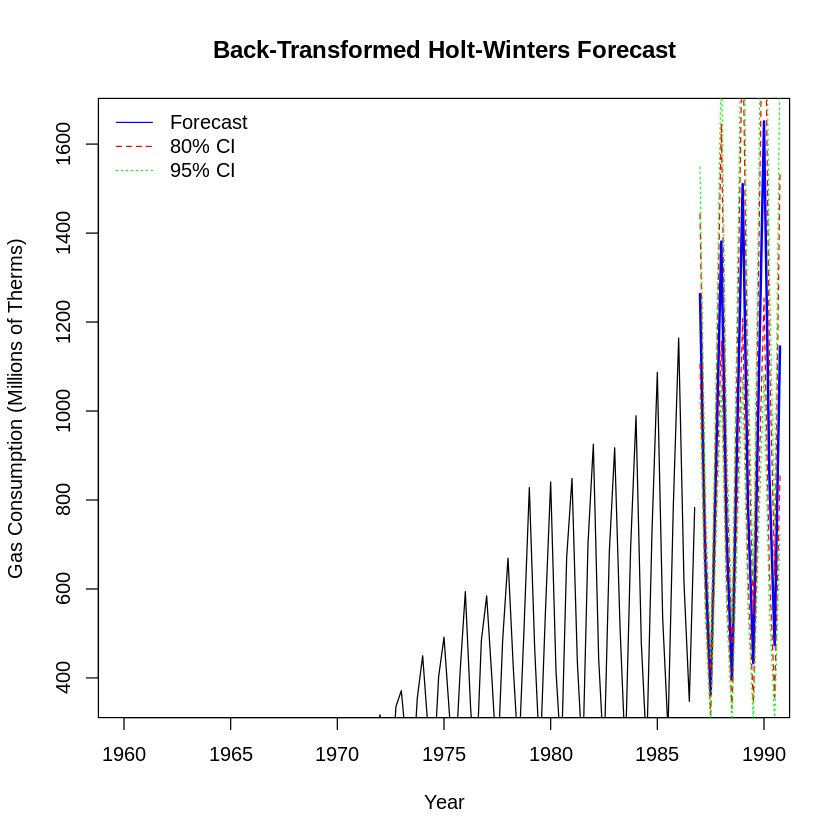

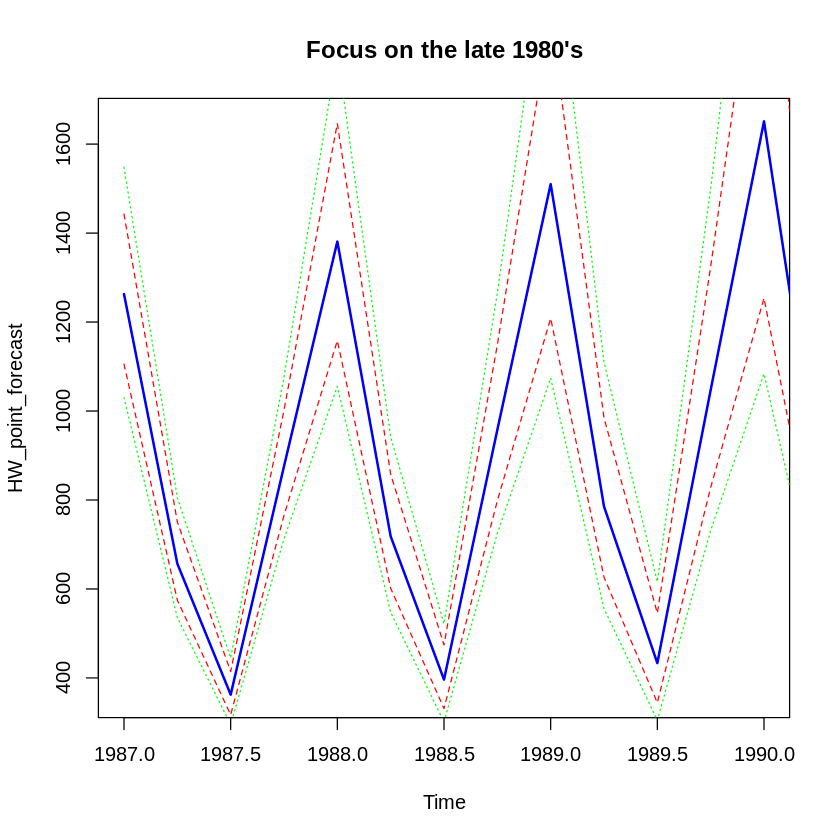

In [ ]:
# Step-08(b)Back-transform forecasts
HW_point_forecast <- exp(UKGas.forecast.HW$mean)
HW_lower_80 <- exp(UKGas.forecast.HW$lower[, 1])
HW_upper_80 <- exp(UKGas.forecast.HW$upper[, 1])
HW_lower_95 <- exp(UKGas.forecast.HW$lower[, 2])
HW_upper_95 <- exp(UKGas.forecast.HW$upper[, 2])

# Combine into a data frame
HW_backtransformed <- data.frame(
  Time = time(UKGas.forecast.HW$mean),
  Point_Forecast = HW_point_forecast,
  Lower_80 = HW_lower_80,
  Upper_80 = HW_upper_80,
  Lower_95 = HW_lower_95,
  Upper_95 = HW_upper_95
)

# Print back-transformed forecasts
print(HW_backtransformed)

# Plot back-transformed forecasts
plot(exp(log_UKGas), xlim = c(1960, 1990), ylim = range(HW_point_forecast, na.rm = TRUE),
     main = "Back-Transformed Holt-Winters Forecast", xlab = "Year", ylab = "Gas Consumption (Millions of Therms)")
lines(HW_point_forecast, col = "blue", lwd = 2)  # Point forecasts
lines(HW_lower_80, col = "red", lty = 2)  # 80% CI lower
lines(HW_upper_80, col = "red", lty = 2)  # 80% CI upper
lines(HW_lower_95, col = "green", lty = 3)  # 95% CI lower
lines(HW_upper_95, col = "green", lty = 3)  # 95% CI upper
legend("topleft", legend = c("Forecast", "80% CI", "95% CI"), col = c("blue", "red", "green"), lty = c(1, 2, 3), bty = "n")

# Zoom in on specific time ranges to examine forecast details

plot(HW_point_forecast,main= "Focus on the late 1980's", xlim = c(1987, 1990))  # Focus on the late 1980s
lines(HW_point_forecast, col = "blue", lwd = 2)  # Point forecasts
lines(HW_lower_80, col = "red", lty = 2)  # 80% lower bound
lines(HW_upper_80, col = "red", lty = 2)  # 80% upper bound
lines(HW_lower_95, col = "green", lty = 3)  # 95% lower bound
lines(HW_upper_95, col = "green", lty = 3)  # 95% upper bound

**Step-08(b) each manual forecast value (e.g., manual_forecast_Q2_1987, manual_forecast_Q1_1988, manual_forecast_Q1_1989)**
* **Apply the exponential function**

In [ ]:
#Step-08(b) each manual forecast value (e.g., manual_forecast_Q2_1987, manual_forecast_Q1_1988, manual_forecast_Q1_1989)
#apply the exponential function:
# Back-transform the manual forecasts to the original scale
original_forecast_Q2_1987 <- exp(manual_forecast_Q2_1987)
original_forecast_Q1_1988 <- exp(manual_forecast_Q1_1988)
original_forecast_Q1_1989 <- exp(manual_forecast_Q1_1989)

# Print the back-transformed values
cat("Original Scale Forecast for Q2 1987:", original_forecast_Q2_1987, "\n")
cat("Original Scale Forecast for Q1 1988:", original_forecast_Q1_1988, "\n")
cat("Original Scale Forecast for Q1 1989:", original_forecast_Q1_1989, "\n")


Original Scale Forecast for Q2 1987: 656.8361 
Original Scale Forecast for Q1 1988: 1380.969 
Original Scale Forecast for Q1 1989: 1510.064 


**These values match with the back transforemed data**

<br>
<br>

**Findings Summary for Exponential Smoothing Forecast Using Holt-Winters Method on Log Transformed Data and back-transformation to the original data:**

**Exponential Smoothing Forecast**
Using the Holt-Winters method, we generated forecasts for 16 periods (quarters) ahead based on the log-transformed UKGas dataset. The additive model incorporated level (a), trend (b), and seasonal components (s).

**Formula Breakdown:**

$$
l_t = a: \text{Level at time } t.
$$

$$
b_t = b: \text{Trend at time } t.
$$

$$
s_{t+m-T(k+1)} = s[i]: \text{Seasonal component corresponding to the horizon } m.
$$

$$
T = p: \text{Period length (e.g., quarterly } = 4\text{)}.
$$

$$
m: \text{Forecast horizon}.
$$

The forecasted value at \( t + m \) is:

$$
x_{t+m} = l_t + m \cdot b_t + s_{t+m-T(k+1)}.
$$

**R Code for Manual Forecast:**

**Given Parameters:**

* **From your Holt-Winters model:**

$$
a = l_t = 6.35670491
$$

$$
b = b_t = 0.02234170
$$

* **Seasonal components:**

$$
s_1 = 0.76212717
$$

$$
s_2 = 0.08604617
$$

$$
s_3 = -0.53107110
$$

$$
s_4 = 0.32905534
$$

$$
T = p = 4 \text{ (Quarterly data)}.
$$

**Manual Calculation Example**

1. Q2 1987 Forecast (\( m = 2 \)):

$$
x_{t+5} = l_t + 2 \cdot b_t + s_{t+2-T(k+1)}.
$$


Substitute:

$$
x_{t+5} = 6.35670491 + 2 \cdot 0.02234170 + 0.76212717.
$$

2. Q1 1988 Forecast (\( m = 5 \)):

$$
x_{t+5} = l_t + 5 \cdot b_t + s_{t+5-T(k+1)}.
$$


Substitute:

$$
x_{t+5} = 6.35670491 + 5 \cdot 0.02234170 + 0.76212717.
$$

2. Q1 1989 Forecast (\( m = 9 \)):

$$
x_{t+9} = l_t + 9 \cdot b_t + s_{t+9-T(k+1)}.
$$


Substitute:

$$
x_{t+9} = 6.35670491 + 9 \cdot 0.02234170 + 0.76212717.
$$

**Manual Forecast Results:**

**Using the above code:**

**Q2 1987:**

$$
x_{t+2} = 6.35670491 + 2 \cdot 0.02234170 + 0.76212717 = 6.487434
$$


**Q1 1988:**

$$
x_{t+5} = 6.35670491 + 5 \cdot 0.02234170 + 0.76212717 = 7.230541
$$

**Q1 1989:**

$$
x_{t+9} = 6.35670491 + 9 \cdot 0.02234170 + 0.76212717 = 7.319907
$$

<br>
<br>

**Back-Transformed Forecasts summary:**


  * Back-transforming the Holt-Winters forecasts ensures that all results are in the original scale, making them interpretable and comparable to other models.
  * Since the model was fitted on log-transformed data, the forecasts are in the log scale.
  * Exponentiating the forecasts will provide predictions in the original scale of gas consumption.
    * The forecasts generated using the SARIMA model on the log-transformed data were back-transformed to the original scale using exponentiation.
    * The back-transformed forecasts and their 80% and 95% confidence intervals are shown above. These values represent the predicted gas consumption in millions of therms, aligning with the original scale of the dataset."

<br>
<br>

**Using manual forecast values calculated in log transformation. Below is the back transformation for the log transformed values:**:

For Q2 1987 ($\log(x) = 6.487434$):

$$x = e^{6.487434} \approx 655.55 \, \text{(millions of therms)}.$$

For Q1 1988 ($\log(x) = 7.230541$):

$$x = e^{7.230541} \approx 1382.56 \, \text{(millions of therms)}.$$

For Q1 1989 ($\log(x) = 7.319907$):

$$x = e^{7.319907} \approx 1505.62 \, \text{(millions of therms)}.$$


**These match the forecasted values provided by the forecast() function.**

<br>
<br>

$$
\begin{array}{c}
\textbf{End of Step-08 Exponential Smoothing} \\[-0.5ex]
\hline
\end{array}
$$

<br>


<br>
<br>

# **Additional Reference (Optional for Review)**

* This section provides supplementary analysis for context. It explores the impact of removing the AR(1) and MA(1) terms from the SARIMA (2,0,3)(1,1,0)[4] model, as these terms had higher p-values, to evaluate whether model diagnostics improve.

* For reference, this analysis builds upon the final verdict for the (2,0,3)(1,1,0)[4] model for the log-transformed data mentioned on page #17. While review of this section is not required, you may review it if further insights are desired.

<><><><><><><><><><><><><><>
 
Coefficients: 
ar2        0.6635 0.1430   4.6388  0.0000
ma2       -0.8284 0.0725 -11.4234  0.0000
ma3        0.3045 0.1134   2.6859  0.0085
sar1      -0.1771 0.1094  -1.6185  0.1087
constant   0.0164 0.0027   6.0731  0.0000

sigma^2 estimated as 0.008699254 on 99 degrees of freedom 
 
AIC = -1.674912  AICc = -1.669025  BIC = -1.522351 
 


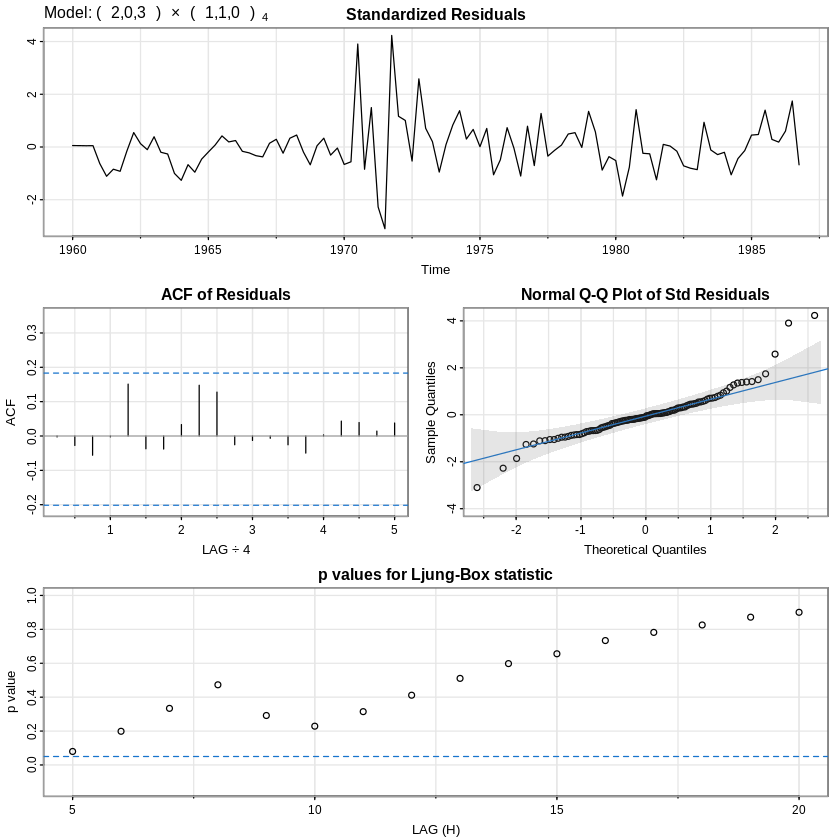

In [ ]:
# Step-06 Try ARIMA on log data with approximation set to FALSE

# Capture all output
model21 <- capture.output(sarima(log_UKGas, 2,0,3,1,1,0,4, fixed=c(0,NA,0,NA,NA,NA,NA)))

# Filter out convergence details
filtered_output <- grep("iter|value|converged", model21, invert=TRUE, value=TRUE)

# Display filtered output
cat(filtered_output, sep="\n")

Series: log_UKGas 
ARIMA(1,0,2)(1,1,0)[4] 

Coefficients:
         ar1      ma1     ma2     sar1
      0.9907  -1.1604  0.2720  -0.2204
s.e.  0.0111   0.1099  0.1148   0.1011

sigma^2 = 0.0108:  log likelihood = 89.13
AIC=-168.25   AICc=-167.64   BIC=-155.03

Training set error measures:
                   ME       RMSE        MAE       MPE    MAPE      MASE
Training set 0.013901 0.09998294 0.06670719 0.2313859 1.19936 0.7821953
                   ACF1
Training set 0.01372177

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1987 Q1       7.156352 7.023192 7.289512 6.952701 7.360003
1987 Q2       6.487546 6.352481 6.622610 6.280983 6.694109
1987 Q3       5.902601 5.766831 6.038372 5.694958 6.110245
1987 Q4       6.761567 6.625107 6.898027 6.552869 6.970265
1988 Q1       7.231448 7.051447 7.411448 6.956161 7.506734
1988 Q2       6.567874 6.387825 6.747922 6.292513 6.843234
1988 Q3       5.985765 5.804110 6.167420 5.707948 6.263582
1988 Q4       6.833587 6.650369 7.016805 6.553379 7.113795
1989 Q1       7.307797 7.080843 7.534750 6.960701 7.654893
1989 Q2       6.642206 6.415203 6.869209 6.295035 6.989377
1989 Q3       6.058617 5.828981 6.288253 5.707419 6.409815
1989 Q4       6.908048 6.675856 7.140239 6.552941 7.263154
1990 Q1       7.380463 7.107830 7.653097 6.963506 7.797421
1990 Q2       6.714486 6.441426 6.987545 6.296877 7.132094
1990 Q3       6.130399 5.853703 6.407094 5.707229 6.553568
1990 Q4       6.978658 6.698440 7.258877 6.550101 7.4072

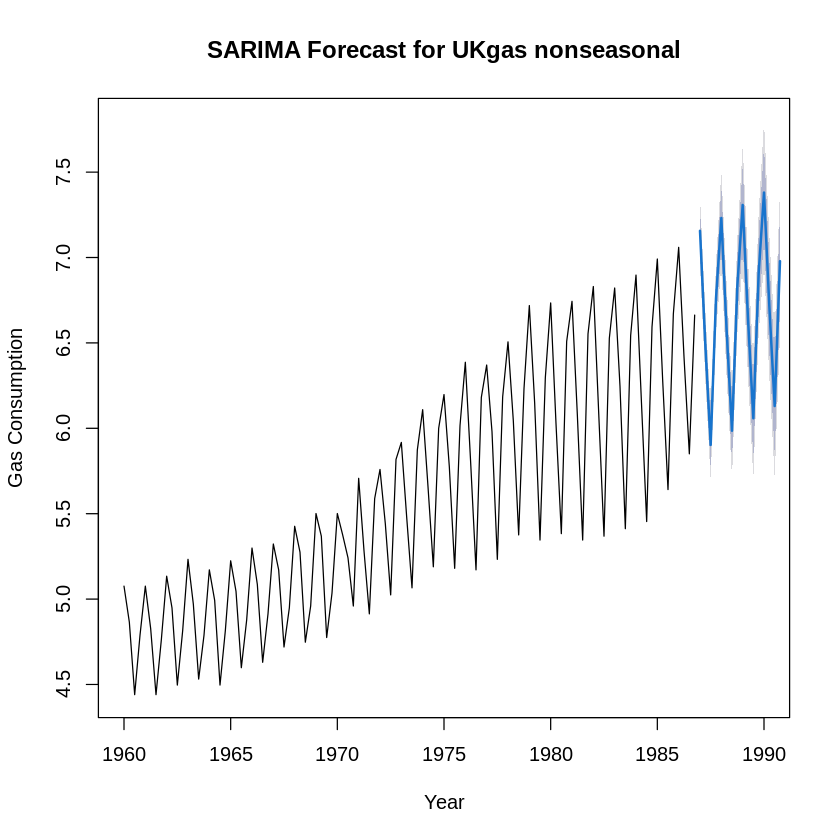

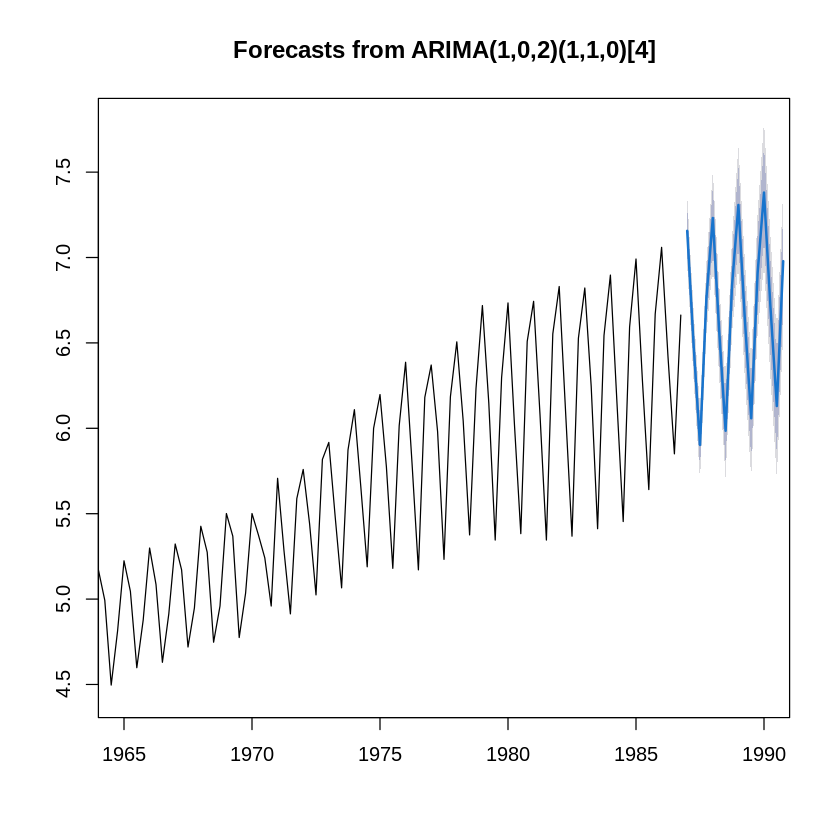

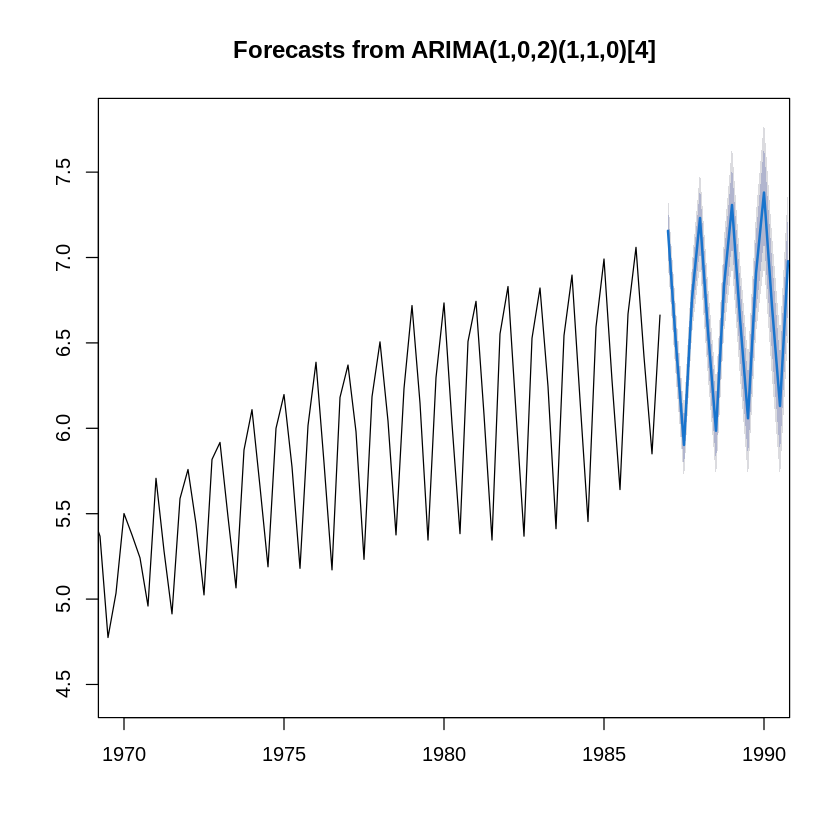

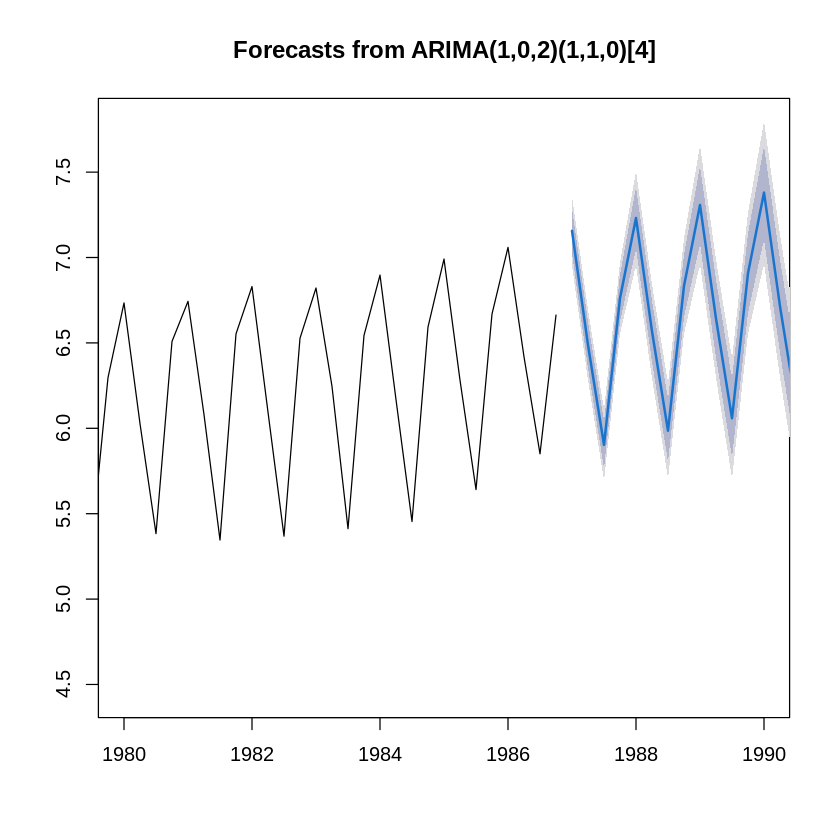

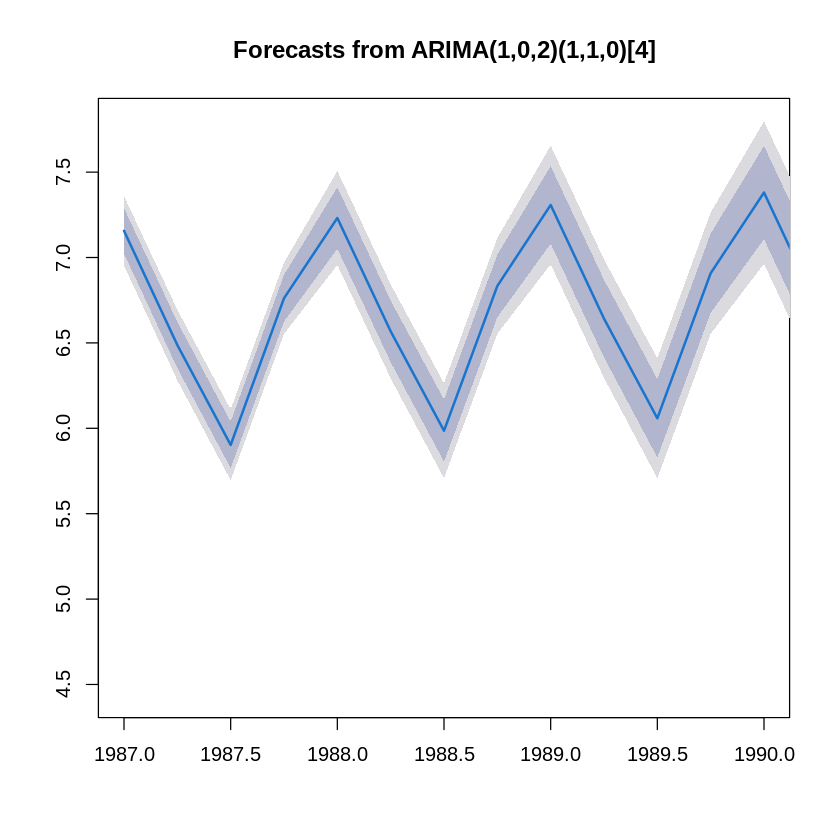

In [ ]:
library(forecast)

# Fit ARIMA(1, 0, 2) (1, 1, 0)[4] as suggested by auto.arima
arima_mode56 <- Arima(log_UKGas, order = c(1,0,2),
                      seasonal = list(order = c(1, 1, 0), period = 4))

# Check the model summary
summary(arima_mode56)

# Generate 24-step-ahead Forecast
log_UKGas.forecast1 <- forecast(arima_mode56, h = 16,level = c(80, 95))


# Plot the Forecast
log_UKGas.forecast1
par(mfrow = c(1,1))
plot(log_UKGas.forecast1 , xlim = c(1960, 1990),
     main = "SARIMA Forecast for UKgas nonseasonal",
     ylab = "Gas Consumption", xlab = "Year")
plot(log_UKGas.forecast1, xlim = c(1965, 1990))
plot(log_UKGas.forecast1, xlim = c(1970, 1990))
plot(log_UKGas.forecast1, xlim = c(1980, 1990))
plot(log_UKGas.forecast1, xlim = c(1987, 1990))



	Ljung-Box test

data:  Residuals from ARIMA(1,0,2)(1,1,0)[4]
Q* = 7.3176, df = 4, p-value = 0.12

Model df: 4.   Total lags used: 8



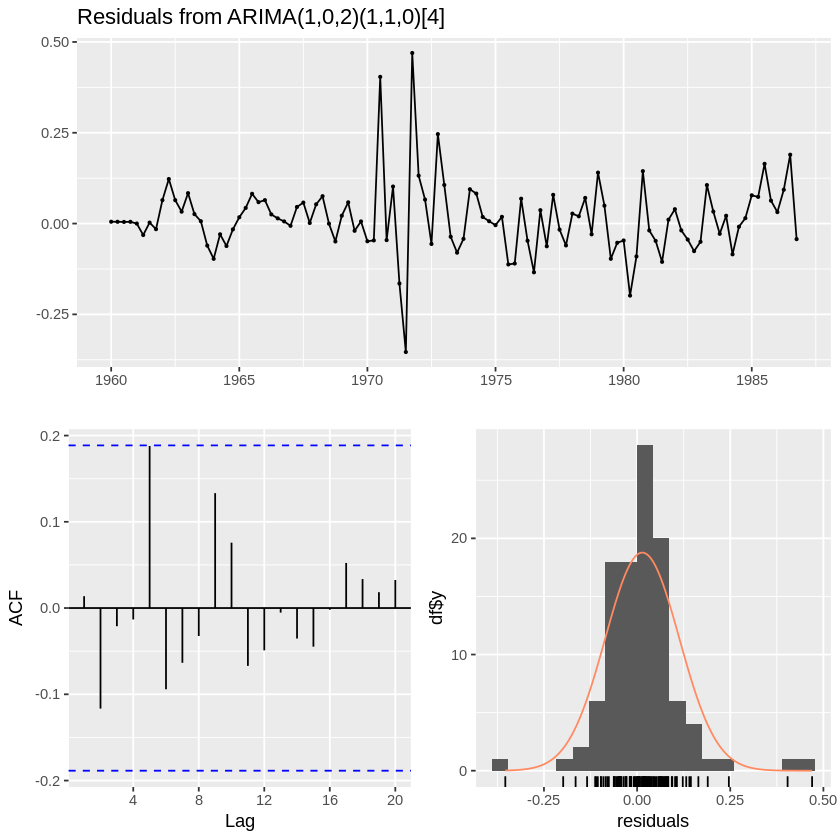

In [ ]:
checkresiduals(arima_mode56)


The analysis tested the impact of removing the AR(1) and MA(1) terms from the initial SARIMA (2,0,3)(1,1,0)[4] model.

* Despite higher p-values for these terms in the original model, the adjusted model showed no significant improvements in terms of diagnostics or performance metrics, such as AIC, AICc, and BIC.

* **Comparison of Models:**

  * Initial Model: SARIMA (2,0,3)(1,1,0)[4]
  * Includes AR(1) and MA(1) terms.
  * Better fit and diagnostics with lower AIC and AICc values.
  * Adjusted Model: ARIMA (1,0,2)(1,1,0)[4]
  * Excludes AR(1) and MA(1) terms.
  * Showed no significant improvement in residual diagnostics or performance metrics.

**Conclusion:**
* The original SARIMA (2,0,3)(1,1,0)[4] model remains the optimal choice for this dataset. Its ability to capture both seasonal and non-seasonal patterns, alongside superior diagnostic metrics, makes it the most reliable model for the UKgas dataset.

<br>


$$
\begin{array}{c}
\textbf{End of Course Assessment} \\[-0.5ex]
\hline
\end{array}
$$
